## Clasificación de Cultivos con Imagenes Satelitales

Última actualización: Domingo 20-12-2020

Este cuaderno contiene el código correspondiente al desarrollo del modelo de clasificación de cultivos elegido -una red convolucional 1D- para participar en la competencia [Desafío AgTech2020](https://desafiosagtech.com/), admitido como Trabajo Final del Curso Visión por Computadora 2 de la Especialización en Inteligencia Artificial - FIUBA.

Autores:

- Brumovsky, Andrés F. (abrumov@gmail.com)
- Delgado, Lautaro (ldc0295@gmail.com)
- Horro, Nicolas E. (nhorro@gmail.com)

## Descripción

Tal como se describe [1D Convolutional Neural Networks and Applications – A Survey](https://arxiv.org/pdf/1905.03554.pdf), este tipo de redes son aptas para problemas de clasificación donde los datos de entrada son series temporales multivariable.

Se ha dado al desafío propuesto el enfoque de un problema de clasificación de series temporales donde cada punto que las constituye se obtiene a partir de imágenes satelitales de distintos momentos del tiempo durante los períodos de campaña de cada cultivo.

### Requisitos de ejecución

- Ambiente recomendado: Google Colab, preferentemente con GPU o TPU. Para ejecución local una alternativa es [con docker de Jupyter Datascience Notebook](https://hub.docker.com/r/jupyter/datascience-notebook/)
- Cuentas de Google Earth Engine y Google Drive para consulta y almacenamiento de imágenes satelitales, pesos de modelos, datasets procesados, etc. 

Nota: todos los archivos que se han generado para el entrenamiento y uso del modelo se incluyen o bien en el [fork del repositorio Github](https://github.com/nhorro/DesafioAgTech2020.git) o con links públicos (para los archivos grandes), los requerimientos anteriores son únicamente si se quiere reproducir el procedimiento completo.

#### Links públicos (Google Drive):
- CSV de entrenamiento con etiquetas, limpio: [train_merged_clean.csv](https://drive.google.com/file/d/1-1IKdwGYsVGWusmJVqQdCpxJ2uiUeIX-/view?usp=sharing)
- CSV de entranamiento con muestras adicionales para balancear clases: [train_expanded_balanced.csv](https://drive.google.com/file/d/1jh_JBSjVZwh9vvlXP7XT2yc5QvrJlzaD/view?usp=sharing)
- CSV ampliado con bandas de Sentinel2 (Train): [train_s2_v1.csv](https://drive.google.com/file/d/1-7_luaV40CCK4t3tyds33KYrYQqK_POu/view?usp=sharing)
- CSV ampliado con series temporales (Train): [train_expanded_balanced_timeseries_pickle.csv](https://drive.google.com/file/d/1-1paK2fE-MnT1jsy8poc8Qt68lE8QBxT/view?usp=sharing)
- CSV ampliado con series temporales (Test): [test_timeseries_pickle.csv](https://drive.google.com/file/d/1-9C7J4oqm4RPa2qdR1wcbU822j4b5K0v/view?usp=sharing)
- Series temporales (Train): [train_expanded_balanced_timeseries_pickle.tar.gz](https://drive.google.com/file/d/1-26vVpCue-dGb6iGzSxk_X3UaFKmZ3uP/view?usp=sharing)
- Series temporales (Test): [test_timeseries_pickle.tar.gz](https://drive.google.com/file/d/1-Exvxwas8xau7s-hwmO9PEGoFS3wBBRi/view?usp=sharing)
- Tabla para convertir de Índice de Clase a Id de Cultivo:[class_idx_to_cultivo_id.pkl](https://drive.google.com/file/d/1-7CkLQ6aoX9aSz1VrdoSexlqIUkc_GQP/view?usp=sharing)
- Estandarización de datos: [skaler.pkl](https://drive.google.com/file/d/1gV4UtL6brZU0jVosD8ndI_bfrCyx1WaW/view?usp=sharing)

### Organización del Cuaderno

Este cuaderno está organizado intentando reproducir el orden en que se fueron explorando los datos, considerando posibles modelos y finalmente seleccionando la mejor estrategia. No obstante se eliminaron los apartados específicos de los modelos descartados para la competencia: datasets de imágenes Sentinel2 y Landsat, SVM, Random Forest, etc.
Sólo se incluye la arquitectura del modelo final seleccionado con el cuál se generó el archivo CSV de mejor puntaje enviado al evaluador de la competencia.
Dado que las posibilidades de combinaciones de todos los juegos de parámetros y opciones de generación y visualización de datos son infinitas, se propone como guía para entender los principales aspectos del problema y se invita a editarlo y ejecutar nuevamente algunas celdas para generar ensayos adicionales.

1. **Setup inicial**: descarga de librerías, autenticación en servicios de Google, inicialización etc. Descarga de dataset.
2. **Carga del dataset y Análisis Exploratorio Inicial**: inspección de los datos, consolidación y conclusiones preliminares.
3. **Preparación del dataset**: ampliación usando información obtenida de imágenes satelitales por medio de GEE y otras librerías.
3. **Ingeniería de Features Básica**: estudio de features utilizando las incorporadas al dataset.
4. **Entrenamiento del Modelo Presentado**: entrenamiento del modelo seleccionado. Descripción de otros modelos y variantes de configuración. Evaluación.
5. **Conclusiones y Análisis de Resultados**.
7. **Preparación de resultado**: generación del CSV para submisión al evaluador de la competencia.
8. **Anexo**: código adicional utilizado para obtener imágenes, procesar datos, o realizar consultas en GEE.

### Links y referencias de interés

- Desafío AgTech 2020
  - [Sitio Web de la Competencia](https://metadata.fundacionsadosky.org.ar/competition/22/)
  - [DesafiosAgTech (github)](https://github.com/DesafiosAgTech/DesafioAgTech2020)
  - [Webinar Recomendaciones para abordar el Desafío Agtech utilizando Python - Desafíos Agtech 2020](https://www.youtube.com/watch?v=Nz01C2VT1MI) 
  - [Repositorio con ejemplos del Webinar (github)](https://github.com/camposalfredo/desafiosAgTech2020)
  - [Desafios Agtech - Webinar GEE](https://www.youtube.com/watch?v=0owpGWnoaZs)
- Google Earth Engine
  - [Google Earth Engine Examples (python)](https://github.com/google/earthengine-api/tree/master/python/examples)
  - [Google Earth Engine Guides](https://developers.google.com/earth-engine/guides)
  - [Application of Google Earth Engine Cloud Computing Platform, Sentinel Imagery, and Neural Networks for Crop Mapping in Canada](https://www.mdpi.com/2072-4292/12/21/3561)
- Sentinel2
  - [Sentinel 2 User Handbook](https://sentinel.esa.int/documents/247904/685211/Sentinel-2_User_Handbook)
  - [SentinelHub eo-learn](https://github.com/sentinel-hub/eo-learn)
- Landsat8
  - [Landsat8 Data Users Handbook](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-8-data-users-handbook) 
- Aplicaciones de Redes Convolucionales 1D para clasificación de señales
  - ["1D Convolutional Neural Networks and Applications – A Survey", Serkan Kiranyaz, Onur Avci, Osama Abdeljaber, Turker Ince, Moncef Gabbouj, Daniel J. Inman](https://arxiv.org/pdf/1905.03554.pdf)

## 1. Setup inicial

Instalación de librerías, descarga de datos, y autenticación en GEE.

In [ ]:
!pip install geehydro geopandas geextract geemap &> /dev/null

### Autenticación GEE y Google Drive

Nota: se usa Google drive para cargar y descargar CSVs con datasets ampliados y otros archivos temporales.

In [ ]:
import ee
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=FYPtsb1QVrBfU7h5dowCF0_6IEMcae5u0qQtcX_jeEQ&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g5d0B2hsQQs4MJeNf-igbtnTRt2eykCuai0OR7nOvZQXYQw8a1ygPk

Successfully saved authorization token.


In [ ]:
ee.Initialize()

Autenticación Google Drive (para carga y descarga de datasets ampliados con features de imagenes satelitales).

In [1]:
GOOGLE_DRIVE_DATA_PATH = "/content/drive/My Drive/Colab Notebooks/DesafioAgTech2020/"
from google.colab import drive
import os
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


## 2. Carga del dataset y Análisis Exploratorio Inicial

Se descarga el [fork del repositorio](https://github.com/nhorro/DesafioAgTech2020.git) que contiene los CSVs originales y otros archivos adicionales agregadoss

In [2]:
!git clone https://github.com/nhorro/DesafioAgTech2020.git &> /dev/null
!unrar -o+ x DesafioAgTech2020/dataset/Gral_Lopez.rar DesafioAgTech2020/dataset/ &> /dev/null
!ls DesafioAgTech2020/dataset 

 data_test.csv	 'Gral Lopez.cpg'  'Gral Lopez.qpj'  'Gral Lopez.shx'
 data_train.csv  'Gral Lopez.dbf'   Gral_Lopez.rar
 Etiquetas.csv	 'Gral Lopez.prj'  'Gral Lopez.shp'


In [ ]:
DATASET_PATH = "./DesafioAgTech2020/dataset/"
TRAIN_CSV_FILENAME = DATASET_PATH+"data_train.csv"
TEST_CSV_FILENAME = DATASET_PATH+"data_test.csv"
LABELS_CSV_FILENAME = DATASET_PATH+"Etiquetas.csv"

Exploración del dataset.

In [ ]:
# GDAL y GEE
from osgeo import osr, ogr, gdal
import geemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

import pickle
from datetime import datetime
import os 
import shutil

from IPython.display import HTML, display

Vista de datos de entrenamiento y etiquetas.

In [ ]:
train_df = pd.read_csv(TRAIN_CSV_FILENAME)
train_df.head()

Id Cultivo   Longitud    Latitud   Elevacion Dataset Campania  GlobalId
0   1       S -62.144163 -33.800202  104.111862      BC    18/19         1
1   4       M -62.155418 -33.801742  105.698082      BC    18/19         4
2   6       N -62.163615 -33.808092  104.233162      BC    18/19         6
3   7       M -62.164773 -33.813671  103.859932      BC    18/19         7
4   9       M -62.097200 -33.778628   98.532104      BC    18/19         9

In [ ]:
labels_df = pd.read_csv(LABELS_CSV_FILENAME)
labels_df

CultivoId Cultivo                         Tipo
0           1       S                       SOJA 1
1           2       s                       SOJA 2
2           3       M                    MAIZ TEMP
3           4       m              MAIZ TARD O 2DA
4           5       T                        TRIGO
5           6       C                       CEBADA
6           7       G                      GIRASOL
7           8       R                        SORGO
8           9       P  FORRAJES, PASTURAS, VERDEOS
9          10       N                CAMPO NATURAL
10         11       B                     BARBECHO
11         12       O        OTROS CULTIVOS VERANO
12         13       o      OTROS CULTIVOS INVIERNO
13         14       E                        MONTE
14         15       A                         AGUA
15         16       g                     GARBANZO
16         17       t                        TOSCA
17         18       L                      LENTEJA
18         19      aa                      ALFALFA
19         20       V                        VICIA
20         21       c                      CENTENO
21         22       a                       ARVEJA
22         23       X                      NO SABE
23         24       U                       URBANO

Se completa el dataset de entrenamiento con la descripción de etiquetas.

In [ ]:
train_df = train_df.join(labels_df.set_index('Cultivo'),on='Cultivo')
train_df

Id Cultivo   Longitud  ...  GlobalId  CultivoId           Tipo
0      1       S -62.144163  ...         1        1.0         SOJA 1
1      4       M -62.155418  ...         4        3.0      MAIZ TEMP
2      6       N -62.163615  ...         6       10.0  CAMPO NATURAL
3      7       M -62.164773  ...         7        3.0      MAIZ TEMP
4      9       M -62.097200  ...         9        3.0      MAIZ TEMP
..   ...     ...        ...  ...       ...        ...            ...
845  467       U -61.607786  ...      1449       24.0         URBANO
846  469       N -62.245215  ...      1451       10.0  CAMPO NATURAL
847  470       N -61.480817  ...      1452       10.0  CAMPO NATURAL
848  471       N -61.470679  ...      1453       10.0  CAMPO NATURAL
849  473       N -61.780876  ...      1455       10.0  CAMPO NATURAL

[850 rows x 10 columns]

In [ ]:
train_df.describe()

Id    Longitud     Latitud   Elevacion     GlobalId   CultivoId
count  850.000000  850.000000  850.000000  850.000000   850.000000  849.000000
mean   243.943529  -61.905162  -33.800339  102.923320   750.588235    4.419317
std    144.458394    0.298277    0.184910   13.791425   418.263748    5.537897
min      1.000000  -62.861688  -34.375327   -0.000023     1.000000    1.000000
25%    119.000000  -62.099017  -33.872251   99.859977   411.500000    1.000000
50%    235.000000  -61.920053  -33.798076  103.869263   758.500000    2.000000
75%    366.750000  -61.709385  -33.671438  109.479976  1108.500000    3.000000
max    550.000000  -61.210180  -33.458219  126.779977  1455.000000   24.000000

Tipos de cultivos y cantidad de campañas.

In [ ]:
train_df.CultivoId.unique()

array([ 1.,  3., 10., 15.,  9.,  8., 19., 23., nan,  2.,  7.,  4., 24.,
       11.,  5.])

Chequeo de Ids. inválidos.

In [ ]:
np.any(np.isnan(train_df.CultivoId.unique()))

True

Se observa que uno de los Ids de cultivo aparece como NaN.

In [ ]:
np.where(train_df.CultivoId.isna())

(array([150]),)

In [ ]:
row_index_with_na = np.where(train_df.CultivoId.isna())[0][0]
train_df.iloc[row_index_with_na,:]

Id               278
Cultivo          S/M
Longitud    -62.0323
Latitud     -33.5726
Elevacion    109.664
Dataset           BC
Campania       18/19
GlobalId         278
CultivoId        NaN
Tipo             NaN
Name: 150, dtype: object

El cultivo está indicado como S/M (Soja/Maiz?) que no tiene asignado un Id, por lo tanto se elimina la fila. Nuevamente se obtiene la lista de cultivos y se convierte la columna a int (antes no se podía por el NaN).

In [ ]:
train_df.dropna(inplace=True)
train_df["CultivoId"] = train_df["CultivoId"].astype(int)
classes_in_dataset = np.sort(train_df.CultivoId.unique())
N_CLASSES = len(train_df.CultivoId.unique())
classes_in_dataset,N_CLASSES

(array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 15, 19, 23, 24]), 14)

Se crean tablas para conversión de Ids a Índices de clases y Etiquetas. Se restringe el problema de clasificación a las clases para las cuales se dispone de aunque sea una muestra. Esto dá un total de 14 clases de las 24 etiquetas del problema original.

Índice (0-13) a identificador de cultivo.

In [ ]:
class_idx_to_cultivo_id = [ int(x) for x in classes_in_dataset]
class_idx_to_cultivo_id, len(class_idx_to_cultivo_id)

([1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 15, 19, 23, 24], 14)

Identificador de cultivo a índice.

In [ ]:
cultivo_id_to_class_idx = [ None if i not in class_idx_to_cultivo_id else class_idx_to_cultivo_id.index(i) for i in range(24+1) ]
cultivo_id_to_class_idx

[None,
 0,
 1,
 2,
 3,
 4,
 None,
 5,
 6,
 7,
 8,
 9,
 None,
 None,
 None,
 10,
 None,
 None,
 None,
 11,
 None,
 None,
 None,
 12,
 13]

Índice de clase a etiqueta.

In [ ]:
class_idx_to_label = [ train_df[train_df.CultivoId==class_idx_to_cultivo_id[i]].reset_index()['Tipo'][0] for i in range(N_CLASSES) ]
class_idx_to_label

['SOJA 1',
 'SOJA 2',
 'MAIZ TEMP',
 'MAIZ TARD O 2DA',
 'TRIGO',
 'GIRASOL',
 'SORGO',
 'FORRAJES, PASTURAS, VERDEOS',
 'CAMPO NATURAL',
 'BARBECHO',
 'AGUA',
 'ALFALFA',
 'NO SABE',
 'URBANO']

Verificación.

In [ ]:
class_idx_to_cultivo_id[0],class_idx_to_cultivo_id[1],class_idx_to_cultivo_id[13]

(1, 2, 24)

In [ ]:
cultivo_id_to_class_idx[1],cultivo_id_to_class_idx[2],cultivo_id_to_class_idx[24]

(0, 1, 13)

In [ ]:
class_idx_to_label[0],class_idx_to_label[1],class_idx_to_label[13]

('SOJA 1', 'SOJA 2', 'URBANO')

Agregado de cólumna con índice de clase a dataset de entrenamiento.

In [ ]:
def map_cultivo_id_to_class_idx(row):
  return cultivo_id_to_class_idx[row['CultivoId']]

In [ ]:
train_df['class_idx'] = train_df.apply(map_cultivo_id_to_class_idx, axis=1, result_type="expand") 
train_df.head(10)

Id Cultivo   Longitud  ...  CultivoId           Tipo class_idx
0   1       S -62.144163  ...          1         SOJA 1         0
1   4       M -62.155418  ...          3      MAIZ TEMP         2
2   6       N -62.163615  ...         10  CAMPO NATURAL         8
3   7       M -62.164773  ...          3      MAIZ TEMP         2
4   9       M -62.097200  ...          3      MAIZ TEMP         2
5  10       N -62.099470  ...         10  CAMPO NATURAL         8
6  14       S -62.131195  ...          1         SOJA 1         0
7  15       S -62.140227  ...          1         SOJA 1         0
8  23       S -62.207429  ...          1         SOJA 1         0
9  25       N -62.172230  ...         10  CAMPO NATURAL         8

[10 rows x 11 columns]

Para posterior uso, se almacena el dataset con estas modificaciones en un CSV, junto con las tablas de conversión y se deja una función de conveniencia para cargarla junto con las tablas de conversión.

In [ ]:
train_df.to_csv(GOOGLE_DRIVE_DATA_PATH+'train_merged_clean.csv')
with open(GOOGLE_DRIVE_DATA_PATH+'class_idx_to_cultivo_id.pkl', 'wb') as f:
    pickle.dump(class_idx_to_cultivo_id, f)
with open(GOOGLE_DRIVE_DATA_PATH+'cultivo_id_to_class_idx.pkl', 'wb') as f:
    pickle.dump(cultivo_id_to_class_idx, f)
with open(GOOGLE_DRIVE_DATA_PATH+'class_idx_to_label.pkl', 'wb') as f:
    pickle.dump(class_idx_to_label, f)

In [ ]:
def load_train_dataset(csv_filename='train_merged_clean.csv'):
  train_df = pd.read_csv(GOOGLE_DRIVE_DATA_PATH+csv_filename)
  with open(GOOGLE_DRIVE_DATA_PATH+'class_idx_to_cultivo_id.pkl', 'rb') as f:
    class_idx_to_cultivo_id = pickle.load(f)
  with open(GOOGLE_DRIVE_DATA_PATH+'cultivo_id_to_class_idx.pkl', 'rb') as f:
    cultivo_id_to_class_idx = pickle.load(f)    
  with open(GOOGLE_DRIVE_DATA_PATH+'class_idx_to_label.pkl', 'rb') as f:
    class_idx_to_label = pickle.load(f)    
  return train_df, class_idx_to_cultivo_id, cultivo_id_to_class_idx,class_idx_to_label

train_df, class_idx_to_cultivo_id, cultivo_id_to_class_idx,class_idx_to_label= load_train_dataset()

Se continúa el análisis exploratorio inicial estudiando la distribución de los datos.

Cantidad de campañas.

In [ ]:
train_df.Campania.unique()

array(['18/19', '19/20'], dtype=object)

Distribución de los cultivos.

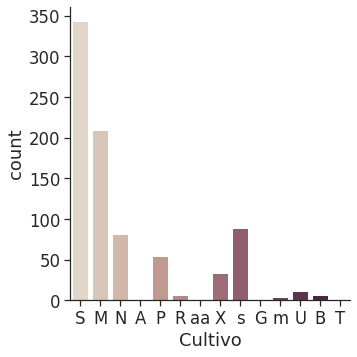

In [ ]:
sns.catplot(x="Cultivo", kind="count", palette="ch:.25", data=train_df)

Distribución de las campañas.

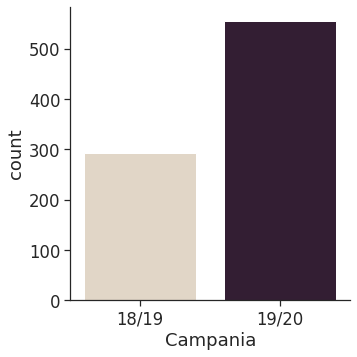

In [ ]:
sns.catplot(x="Campania", kind="count", palette="ch:.25", data=train_df)

Se observa que el dataset está significativamente desbalanceado en favor de la soja e involucra más datos de la Campaña 19/20 que 18/19.
Es posible compensar el desbalance de las clases conocidas agregando maś muestras, pero el clasificador estará limitado a reconocer sólo las 14 clases para las que fue entrenado y eventualmente una quinceava clase que sea "Desconocido", que será el valor devuelto cuando la probabilidad de las conocidas no supere un umbral mínimo.

### Visualización de puntos y región de General López

La visualización que se presenta a continuación es sólo para desarrollar las primeras intuiciones. Los puntos del datataset provienen de diferentes campañas y la fecha de la imagen satelital no se corresponde con las fechas de cada punto.

Determinación de la región mínima requerida que contenga todos los puntos de train y de test.

In [ ]:
test_df = pd.read_csv(TEST_CSV_FILENAME)
print("Long_min (train): ", test_df['Longitud'].min() )
print("Long_max (train): ", test_df['Longitud'].max() )
print("Lat_min (train): ", test_df['Latitud'].min() )
print("Lat_max (train): ", test_df['Latitud'].max() )

Long_min (train):  -62.80695696229395
Long_max (train):  -61.30728194783231
Lat_min (train):  -34.36715757046545
Lat_max (train):  -33.46063468244461


In [ ]:
print("Long_min (test): ", test_df['Longitud'].min() )
print("Long_max (test): ", test_df['Longitud'].max() )
print("Lat_min (test): ", test_df['Latitud'].min() )
print("Lat_max (test): ", test_df['Latitud'].max() )

Long_min (test):  -62.80695696229395
Long_max (test):  -61.30728194783231
Lat_min (test):  -34.36715757046545
Lat_max (test):  -33.46063468244461


In [ ]:
long0 = min(test_df['Longitud'].min(), train_df['Longitud'].min() )
long1 = max(test_df['Longitud'].max(), train_df['Longitud'].max() )
lat0 = min(test_df['Latitud'].min(), train_df['Latitud'].min() )
lat1 = max(test_df['Latitud'].max(), train_df['Latitud'].max() )
lat = (lat0+lat1)/2
lon = (long0+long1)/2
print("Long_min: ", long0 )
print("Long_max: ", long1 )
print("Lat_min: ", lat0 )
print("Lat_max: ", lat1 )
print("Lon,lat (punto central):",lon,lat)
boundary_ungs = ee.Geometry.Rectangle([long0, lat0, long1, lat1])

Long_min:  -62.86168788358889
Long_max:  -61.21017986410942
Lat_min:  -34.37532678620215
Lat_max:  -33.45821861509694
Lon,lat (punto central): -62.03593387384916 -33.916772700649545


Crear mapa de la zona con Folium.

In [ ]:
import folium
import IPython
from IPython.display import HTML, display
import geehydro
map = folium.Map(location=[lat,lon], zoom_start=9)
map.setOptions('HYBRID') # SATELLITE
None

Agregar el polígono de interés. 


In [ ]:
import geopandas as gpd
gdf = gpd.read_file("DesafioAgTech2020/dataset/Gral Lopez.shp")
gdf.to_file("region.geojson", driver='GeoJSON',name="Región")
folium.GeoJson( "region.geojson").add_to(map)

Agregar marcadores para visualizar algunos cultivos del dataset (train).

In [ ]:
marker_labels= {
    "S": [ "Soja", "red"],
    "M": [ "Maiz", "yellow"],
    "N": [ "Campo Natural", "green"],
    "A": [ "Agua", "lightblue"]
}
for k,v in marker_labels.items():
  for x in train_df[train_df.Cultivo == k][['Longitud','Latitud']].iterrows():    
    crop_long = x[1][0]
    crop_lat = x[1][1]
    #print(crop_lat, crop_long)
    folium.CircleMarker( location=[crop_lat, crop_long], radius=5, 
                        line_color='black',fill_color=v[1], 
                        fill_opacity=0.5).add_to(map)

In [ ]:
map.add_child(folium.LatLngPopup())
map.add_child(folium.LayerControl())
map

Observación: haciendo zoom en el mapa interactivo se puede ver que algunos de los puntos están muy próximos a la frontera de su cultivo. 
Esto es un problema si se quieren usar los puntos como centro de un área más grande (por ejemplo para formar un parche o para una estadística) porque se estaría mezclando información con otro cultivo desconocido.
Si bien podrían desplazarse y centrarse manualmente, esto iría en contra del requerimiento de usar un algoritmo completamente automático, por lo que debería agregarse una etapa previa de segmentación. Este paso no llegó a incorporarse en este trabajo.

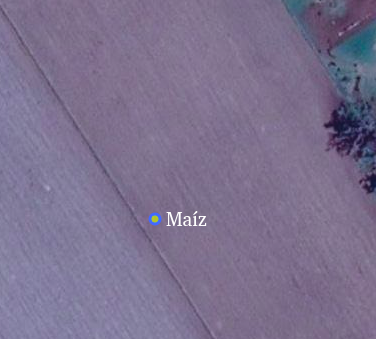

### Curvas de principales índices espectrales por campaña y tipo de cultivo

Es de interés estudiar las fechas en las que cada tipo de cultivo está sembrado y en crecimiento para utilizar estas imágenes como entrada del clasificador. Uno de los métodos es encontrar aquellos intervalos que tengan valores altos de NDVI, ún índice directamente asociado al nivel de crecimiento de la vegetación. 
Esto se hará para facilitar la detección de características en las imágenes para cada tipo de cultivo y campaña.

Se puede hacer este análisis utilizando la información de distintos satélites, pero para simplificar la obtención de los arreglos de muestras desde GEE se utiliza la librería [geextract](https://pypi.org/project/geextract/) que tiene algunos de los disponibles de GEE (ejemplo Landsat 7 y 8). Desafortunadamente Sentinel2 no está disponible en la versión actual.

A continuación se listan las bandas de Landsat8. Una referencia completa sobre las bandas y sus aplicaciones se encuentra en [Landsat8 Data Users Handbook](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-8-data-users-handbook).

Banda | Descripción       | Longitud de Onda ($\mu m$) | Resolución(m)
--- | ------------------- | --------- | ------------- | 
1   | Coastal aerosol     | 0.43-0.45 | 30 |
2   | Blue                | 0.45-0.51 | 30 |
3   | Green               | 0.53-0.59 | 30 |
4   | Red                 | 0.64-0.67 | 30 |
5   | Near Infrared (NIR) | 0.85-0.88 | 30 |
6   | SWIR 1              | 1.57-1.65 | 30 |
7   | SWIR 2              | 2.11-2.29 | 30 |
8   | Panchromatic        | 0.50-0.68 | 15 |
9   | Cirrus              | 1.36-1.38 | 30 |
10  | Thermal Infrared (TIRS) 1 | 10.6-11.19 | 100 |
11  | Thermal Infrared (TIRS) 2 | 11.50-12.51 | 100 |

#### Índices de bandas espectrales

Los Índices de Vegetación, son valores calculados a partir de operaciones algebraicas entre distintas bandas espectrales a nivel de píxel (es decir, se puede obtener una nueva imagen por cada índice).
El objetivo es destacar determinados píxeles relacionados con parámetros de las coberturas vegetales: densidad, índice de área foliar y actividad clorofílica.

##### Indice de Vegetación Normalizada

Uno de los principales índices es el Indice de Vegetación Normalizada (NDVI, por sus siglas en inglés).
Las plantas absorben radiación solar en la región espectral de radiación fotosintética activa, la cual es usada como fuente de energía en el proceso de fotosíntesis. Las células vegetales han evolucionado para dispersar la radiación solar en la región espectral del infrarrojo cercano, la cual lleva aproximadamente la mitad del total de la energía solar, debido a que el nivel de energía por fotón en ese dominio (de longitud de onda mayor a los 700 nm) no es suficiente para sintetizar las moléculas orgánicas: una fuerte absorción en este punto solo causaría en un sobrecalentamiento de la planta que dañaría los tejidos. Por lo tanto:

- la vegetación aparece relativamente oscura en la región de radiación fotosintética activa y relativamente brillante en el infrarrojo cercano. 
- En contraste, las nubes y la nieve tienden a ser bastante brillantes en el rojo así como también en otras longitudes de onda visibles (mostrándose de color blanco), y bastante oscura en el infrarrojo cercano (debido a que el agua absorbe bien la radiación infrarroja).

Fuentes: 

- [Landsat Surface Reflectance Derived Spectral Indices](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-surface-reflectance-derived-spectral-indices?qt-science_support_page_related_con=0#qt-science_support_page_related_con)
- [Wikipedia, Indice de Vegetación Normalizada](https://es.wikipedia.org/wiki/%C3%8Dndice_de_vegetaci%C3%B3n_de_diferencia_normalizada)
- [6 Índices (no NDVI) para un mejor análisis del campo](https://eos.com/es/blog/indices-de-vegetacion/)

Se implementa una función para calcular algunos de los índices recomendados en las referencias anteriores a partir de las bandas Landsat8.

##### Normalized Difference Vegetation Index (NDVI)



$$
NDVI = \frac{\rho_{NIR} - \rho_R}{\rho_{NIR} + \rho_R}
$$

In [ ]:
def ndvi(x):
    try:
        return (x['B5'] - x['B4']) / (x['B5'] + x['B4'])
    except:
        pass

##### Enhanced Vegetation Index (EVI)

Este índice presenta algunas mejoras respecto a NDVI, mostrando una mejor respuesta ante la presencia de ruido de fondo y atmosférico y menor propensión a saturar.

$$
EVI = \frac{\rho_{NIR} - \rho_R}{\rho_{NIR} + 6\rho_R - 7.5\rho_B + 1}
$$

Fuente: [Wikipedia, Enhanced Vegetation Index](https://en.wikipedia.org/wiki/Enhanced_vegetation_index)

In [ ]:
def evi(x):
    try:
        return (2.5 * ((x['B5'] - x['B4']) / ((x['B5'] + 6 * x['B4'] - 7.5 * x['B2']) + 1)))
    except:
        pass

##### Soil Adjusted Vegetation Index (SAVI)

El Índice de vegetación ajustado al suelo (SAVI) es un índice de vegetación que intenta minimizar las influencias del brillo del suelo utilizando un factor de corrección. Esto con frecuencia se utiliza en regiones áridas en donde la cubierta de vegetación es baja, y presenta una saturación menor que el NDVI a valores altos del índice.

$$
SAVI = \frac{\rho_{NIR} - \rho_{Red}}{\rho_{NIR} + \rho_{Red} + L)} (1 + L)
$$

siendo L la constante de cantidad de cobertura de vegetación verde, cuyo valor recomendado para Landsat8 es 0.5.


Fuente: [360 Soporte GeoAgro, Qué es un SAVI](https://360soporte.geoagro.com/portal/es/kb/articles/que-es-un-savi)

In [ ]:
def savi(x):
  try:
      return ((x['B5']-x['B4'])/(x['B5']+x['B4']+0.5))*1.5
  except:
      pass

##### Normalized Difference Moisture Index (NDMI)

Este índice permite obtener los niveles de humedad en la vegetación. Algunas de sus aplicaciones son para monitorear sequías y niveles de combustible en zonas propensas a incendios. Utiliza las bandas NIR y SWIR para mitigar efectos de la iluminación y atmosféricos:

$$
NDMI = \frac{\rho_{NIR} - \rho_{SWIR1}}{\rho_{NIR} + \rho_{SWIR1}}
$$

Fuente: [Space4Water Portal - Normalized Difference Moisture Index (NDMI)](http://space4water.org/taxonomy/term/1248)

In [ ]:
def ndmi(x):
  try:
      return (x['B5']-x['B6'])/(x['B5']+x['B6'])
  except:
      pass

##### Moisture Stress Index (MSI)

Este índice es sensible al incremento de contenido de agua en las hojas de la vegetación. A medida que aumenta el contenido de agua en las hojas. Dado que la absorsión de ondas a 819nm  no se vé afectada, se usa como referencia.
Valores altos de agua están asociados a vegetación sana y se vincula directamente a la productividad de los cultivos, no obstante este índice está invertido. Un valor alto del índice indica menos contenido de agua y un ambiente hostíl para la vegetación.

$$
MSI =  \frac{\rho_{SWIR1}}{\rho_{NIR}}
$$

Fuente: [L3HARRIS Geospatial - Canopy Water Content](https://www.l3harrisgeospatial.com/docs/CanopyWaterContent.html)

In [ ]:
def msi(x):
  try:
      return x['B6']/x['B5']
  except:
      pass

##### Green Coverage Index (GCI)


Este índice se asocia al nivel de clorofila en la vegetación y se utiliza como complemento de los anteriores como indicador de su salubridad.

$$
MSI =  \frac{\rho_{NIR}}{{\rho_{G}}}
$$


In [ ]:
def gci(x):
  try:
      return (x['B5']/x['B3'])-1
  except:
      pass

##### Normalized Difference Water Index (NDWI)

Este índice también se utiliza como complemento de los anteriores para estimar la cantidad de contenido de agua de las hojas.

$$
NDWI =  \frac{\rho_{NIR} -\rho_{SWIR1}}{\rho_{NIR} + \rho_{SWIR1}}
$$

Fuente: [Wikipedia, Normalized Difference Water Index](https://en.wikipedia.org/wiki/Normalized_difference_water_index)

In [ ]:
def ndwi(x):
  try:
      return (x['B3']-x['B5'])/(x['B3']+x['B5'])
  except:
      pass

La función *get_spectral_time_series()* calcula para las filas suministradas las curvas de los índices anteriores para el período indicado.

In [ ]:
from geextract import ts_extract, get_date
from scipy.interpolate import interp1d

from datetime import datetime 

def get_spectral_time_series(row,start_month=10,end_month=6,radius=500,stats="mean"):
  campaign = row['Campania']   
  year0 = int(campaign.split("/")[0])
  year1 = int(campaign.split("/")[1])
  ts0 = (datetime.combine(datetime(2000+year0, start_month, 1), datetime.min.time()).timestamp()/ 60 / 60 / 24)
  ts1 = (datetime.combine(datetime(2000+year1, end_month, 28), datetime.min.time()).timestamp()/ 60 / 60 / 24)
  raw_dict = ts_extract(lon=row['Longitud'], lat=row['Latitud'], sensor='LC8',
                      start=datetime(2000+year0, start_month, 1), 
                      end=datetime(2000+year1, end_month, 1),
                      bands =  ['B2', 'B3', 'B4', 'B5', 'B6', 'B7'],
                      radius=radius,
                      stats=stats)

  #[get_date(d['id']) for d in raw_dict]
  x_dates = np.array([get_date(d['id']) for d in raw_dict])
  y = np.array([[(datetime.combine(get_date(d['id']), datetime.min.time()).timestamp()/ 60 / 60 / 24) - ts0 for d in raw_dict],
                [ndvi(d) for d in raw_dict],
                [evi(d) for d in raw_dict],
                [savi(d) for d in raw_dict],
                [ndmi(d) for d in raw_dict],
                [msi(d) for d in raw_dict],
                [gci(d) for d in raw_dict],
                [ndwi(d) for d in raw_dict]
  ],dtype=float).T

  # Remover NaNs 
  y = y[~np.any(np.isnan(y),axis=1)]

  # Remover fechas duplicadas
  y_unique, y_unique_index = np.unique(y[:,0], axis=0, return_index=True)
  y = y[y_unique_index]
  x_dates = x_dates[y_unique_index]
  m = int(ts1-ts0)
  return x_dates,y,m

Se utiliza la función *perform_time_series_analysis()* para generar los gráficos de evolución en el tiempo de cada índice y su distribución, para desarrollar una primera intuición de si estas curvas pueden ser utilizadas para discriminar las clases.

Más adelante se establecerá una conexión entre como estas curvas toman formas particulares para un tipo de uso de el suelo del mismo modo que las curvas de señales biométricas (cardiogramas, información motriz obtenida colocando giróscopos y acelerómetros en determinadas partes de partes del cuerpo, temperatura, etc.) pueden utilizarse para caracterizar una actividad realizada por un paciente.

Los puntos consultados corresponden a una estadística de los valores de cada índice en ese punto para un radio dado. Por defecto se utiliza el promedio de los valores para un radio de 50 metros (si bien se sabe que esto introducirá algunos errores por los puntos que se encuentran en la frontera de un cultivo).

Por defecto se interpolan linealmente las muestras obtenidas para componer la curva y se hace un remuestreo a 2048 puntos.

In [ ]:
def perform_time_series_analysis(df,start_month=10,end_month=6,radius=50,stats="mean",
                                 poly_interpolation="slinear",sample_size=2048,figname=""):
  n_rows = len(df)
  if n_rows>30:
    n_rows=30
  
  fig, axes = plt.subplots(n_rows,2,figsize=(24,3*n_rows))  
  for i in range(n_rows):  
    # Get array and polyfit
    row = df.iloc[i,:]
    x_dates,y,m = get_spectral_time_series(row,start_month,end_month,radius,stats)
    
    t = np.linspace(0,m,sample_size)    
    
    poly_interpolation = "slinear"
    ndvi = interp1d(y[:,0], y[:,1], kind=poly_interpolation,fill_value="extrapolate")
    evi = interp1d(y[:,0], y[:,2], kind=poly_interpolation,fill_value="extrapolate")
    savi = interp1d(y[:,0], y[:,3], kind=poly_interpolation,fill_value="extrapolate")
    ndmi = interp1d(y[:,0], y[:,4], kind=poly_interpolation,fill_value="extrapolate")
    msi = interp1d(y[:,0], y[:,5], kind=poly_interpolation,fill_value="extrapolate")
    cgi = interp1d(y[:,0], y[:,6], kind=poly_interpolation,fill_value="extrapolate")
    ndwi = interp1d(y[:,0], y[:,7], kind=poly_interpolation,fill_value="extrapolate")

    # Plot    
    axes[i][0].plot(t,ndvi(t),"-")
    axes[i][0].plot(t,evi(t),"-")
    axes[i][0].plot(t,savi(t),"-")
    axes[i][0].plot(t,ndmi(t),"-")
    axes[i][0].plot(t,msi(t),"-")
    axes[i][0].plot(t,cgi(t),"-")
    axes[i][0].plot(t,ndwi(t),"-")

    axes[i][0].grid(which='Both') 
    axes[i][0].legend(["1. NDVI","2. EVI","3.SAVI","4.NDMI","5.MSI","6.GCI","7.NDWI"])
    axes[i][0].set_xlabel("Días transcurridos desde el mes %d" % start_month)
    axes[i][0].set_ylabel("Valor")
    axes[i][0].set_title("Cultivo %s (GID=%d) Campaña %s" % (row['Tipo'], row["GlobalId"], row["Campania"]) )
    
    # Hist
    axes[i][1].hist(y[:,1], histtype='step')
    axes[i][1].hist(y[:,2], histtype='step')
    axes[i][1].hist(y[:,3], histtype='step')
    axes[i][1].hist(y[:,4], histtype='step')
    axes[i][1].hist(y[:,5], histtype='step')
    axes[i][1].hist(y[:,6], histtype='step')
    axes[i][1].hist(y[:,7], histtype='step')
    axes[i][1].legend(["1. NDVI","2. EVI","3.SAVI","4.NDMI","5.MSI","6.GCI","7.NDWI"])
    axes[i][1].grid(which='Both')
    axes[i][1].set_ylabel("Frec.")
    axes[i][1].set_xlabel("Índice")
    axes[i][1].set_title("Histograma")

  plt.tight_layout()
  plt.show() 
  if figname:
    plt.savefig(figname+".png")
    fig.clear()

Ejemplo para cultivo Soja, campaña 19/20.

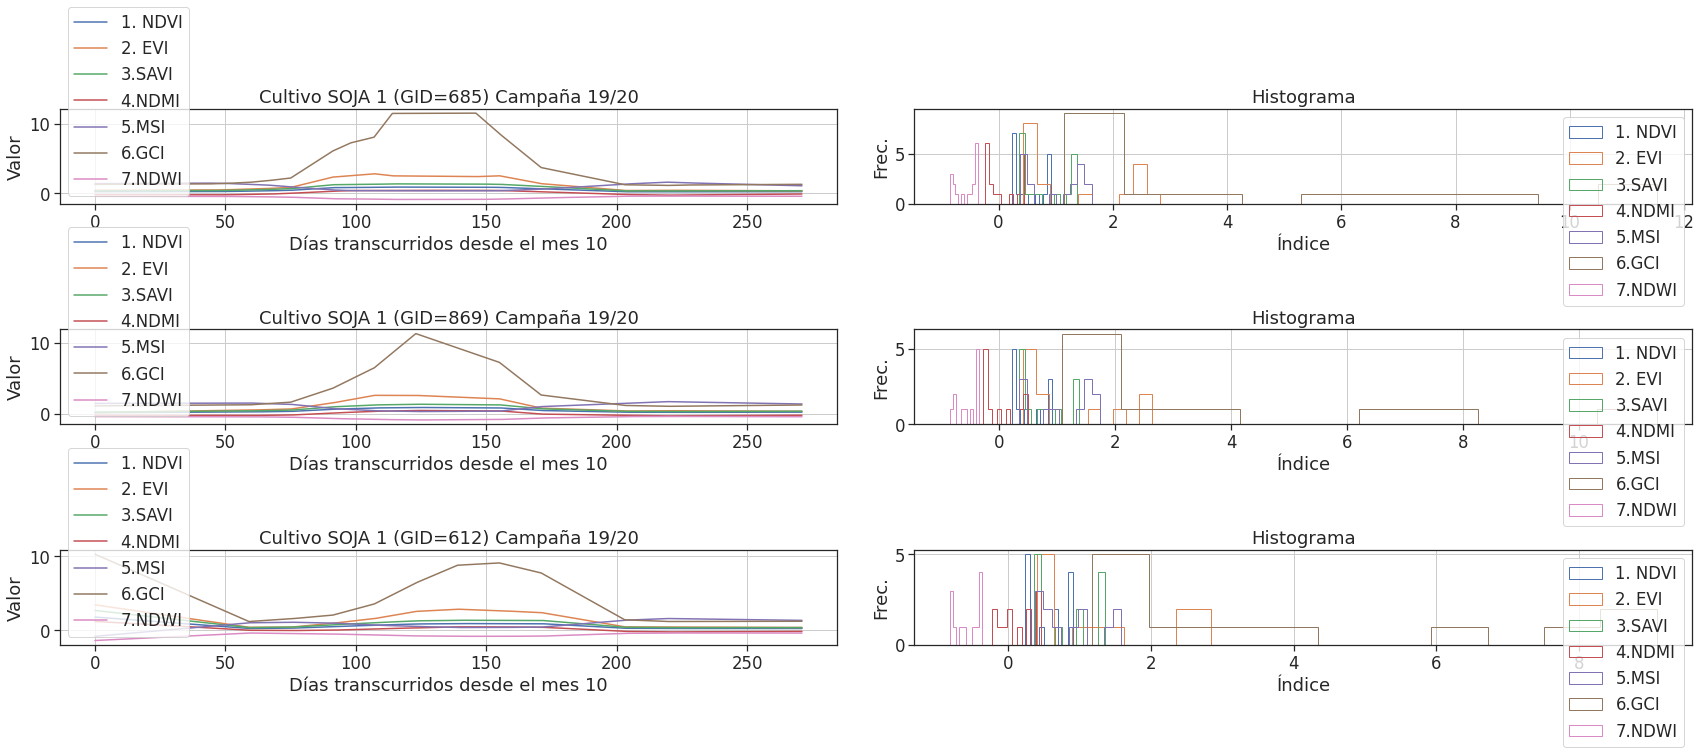

In [ ]:
perform_time_series_analysis( train_df[(train_df.Cultivo == "S") & (train_df.Campania=="19/20") ].sample(3))

Ejemplo para cultivo Maiz, campaña 19/20.

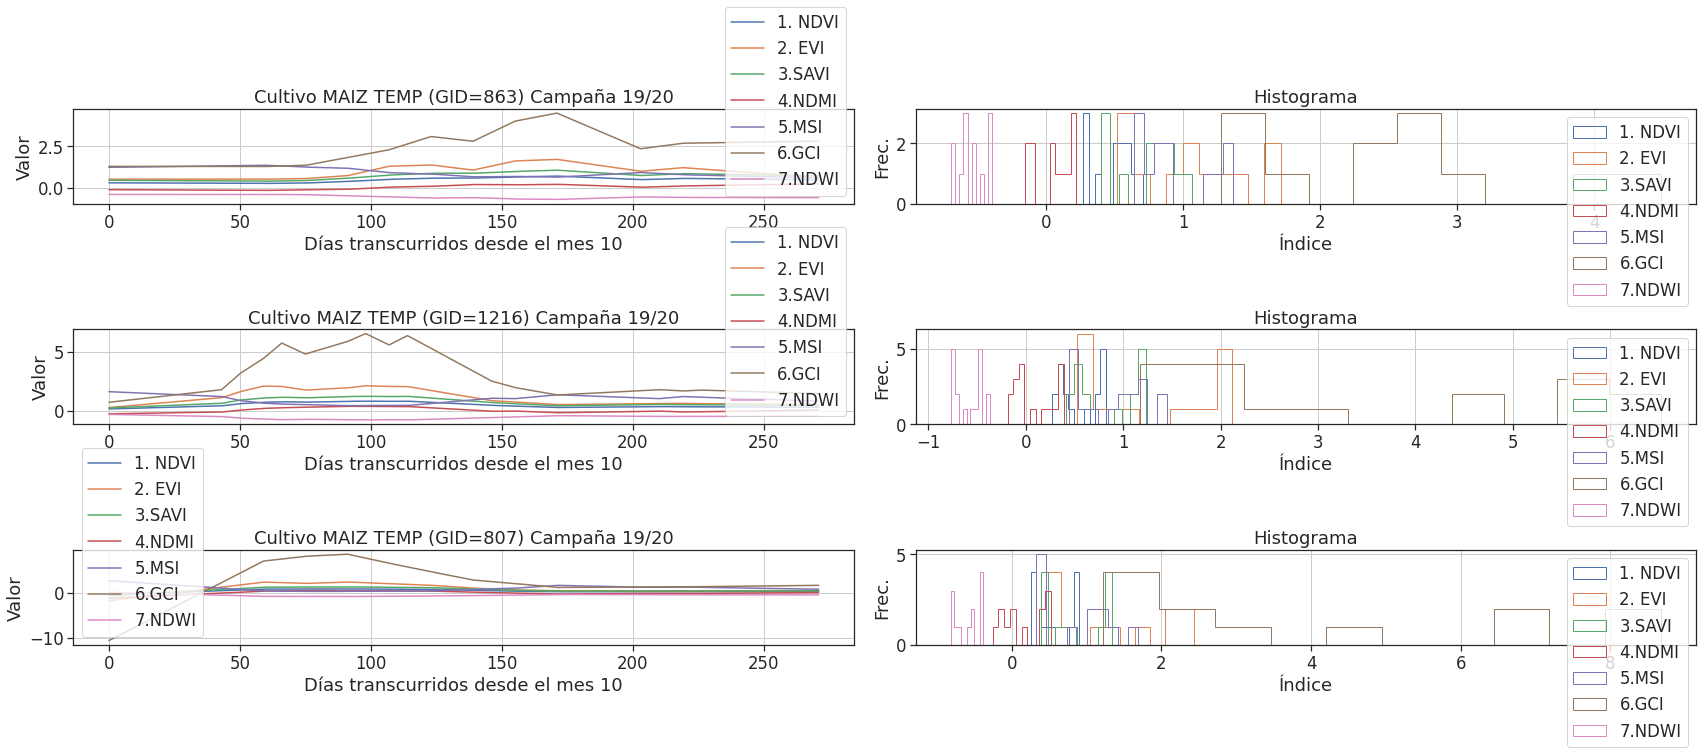

In [ ]:
perform_time_series_analysis( train_df[(train_df.Cultivo == "M") & (train_df.Campania=="19/20") ].sample(3))

Ejemplo para cultivo Forrajes, Pasturas, Verdeos, campaña 19/20.

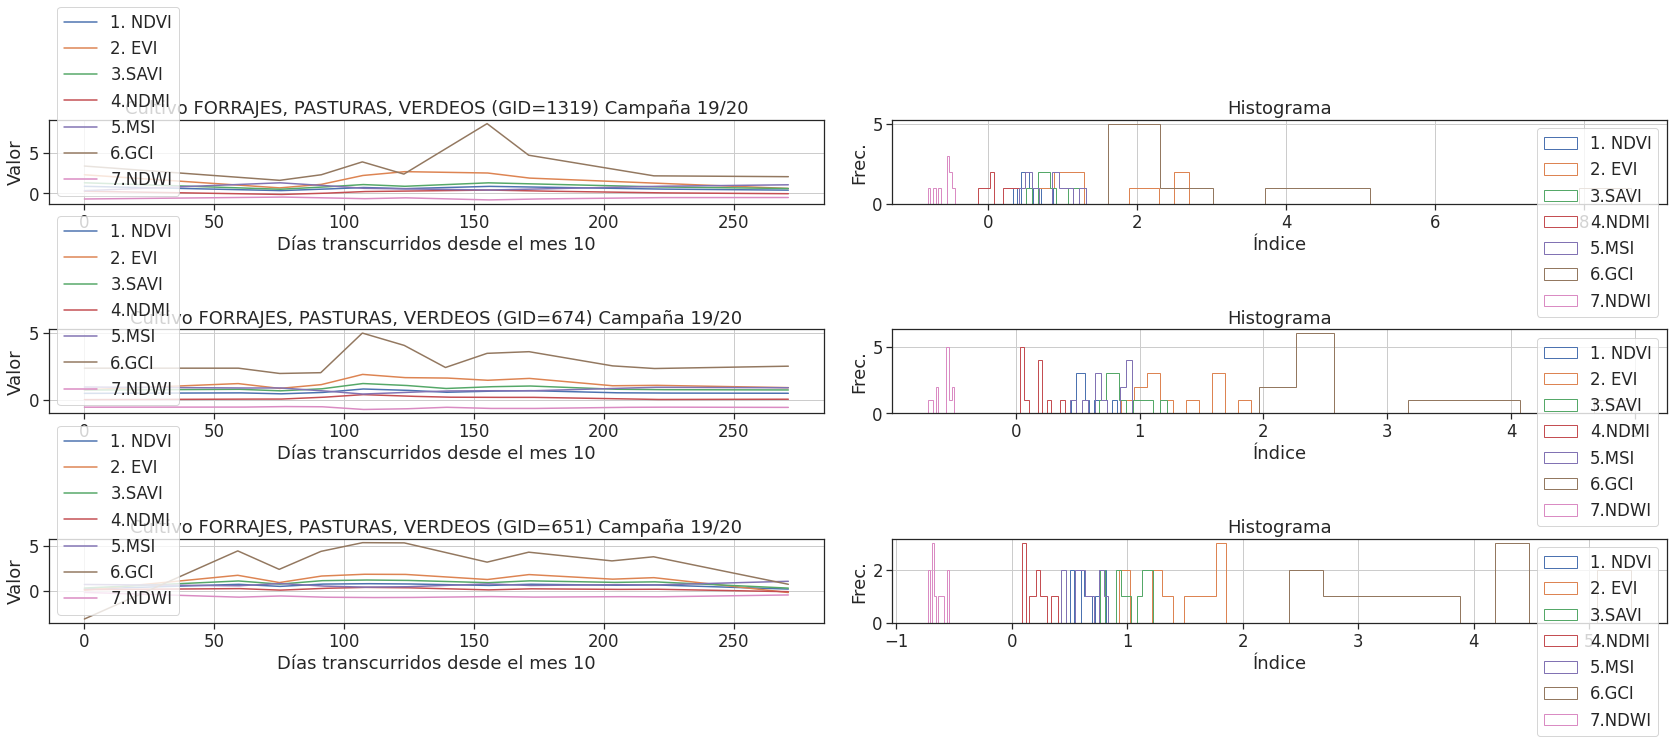

In [ ]:
perform_time_series_analysis( train_df[(train_df.Cultivo == "P") & (train_df.Campania=="19/20") ].sample(3))

A modo de primer conclusión, parece posible, si se toman varias curvas para cada cultivo, discriminar a partir de las mismas algunos tipos con una precisión aceptable. 
Por ejemplo, la forma de los montículos del GCI en la mayoría de los casos tiene una forma más ensanchada entre los días 50 y 200 para el caso de los cultivos de máiz y soja, mientras que en forrajes y pasturas no está tan establecida. Este índice también toma valores significativamente más altos en el caso de la Soja.

La siguiente función genera gráficos para todos los cultivos y campañas en imágenes separadas.

In [ ]:
def generate_full_report_in_separate_images(df):
  for class_idx in range(14):
    for campaign in ["18/19","19/20"]:
      #class_idx = 1
      #campaign = "18/19"
      df_filter = (df.class_idx==class_idx) & (df.Campania==campaign)  
      n_samples = len(df[df_filter])
      if n_samples > 10: 
        n_samples = 10
      if n_samples >= 2:      
        sample_df = df[df_filter].sample(n_samples)
        perform_time_series_analysis(sample_df,start_month=1,end_month=12,radius=100,stats="mean",
                                    figname="cid_%d_%s" % (class_idx, campaign[0:2]))
      else:
        print("No hay suficientes muestras (%d) para %d %s" % (n_samples, class_idx, campaign))
generate_full_report_in_separate_images(train_df)        

In [ ]:
!tar -czvf curvas_cultivos.tar.gz *.png

Nota: se incluyen la salida de más curvas generadas con esta función para todos los cultivos en el directorio 'resultado' del repositorio.

## 3. Preparación del dataset

Se hacen dos tipos de ampliación del dataset recibido:

1. **Agregado de features**: en este caso el objetivo es ampliar el dataset (tanto el de train, el de test) con información obtenida de las imágenes satelitales para cada muestra. La clase *DataframeAugmenter* y la función *augment_dataset()* que se implementan a continuación utilizan el patrón de diseño [Strategy](https://es.wikipedia.org/wiki/Strategy_(patr%C3%B3n_de_dise%C3%B1o)) para implementar distintas estrategias de ampliación de un Dataframe para facilitar la generación de distintas combinaciones de features adicionales.
2. **Agregado de muestras**: en este caso, se agregan muestras tomando puntos próximos a los existentes para evitar el overfitting de los clasificadores y compensar los datos desbalanceados.

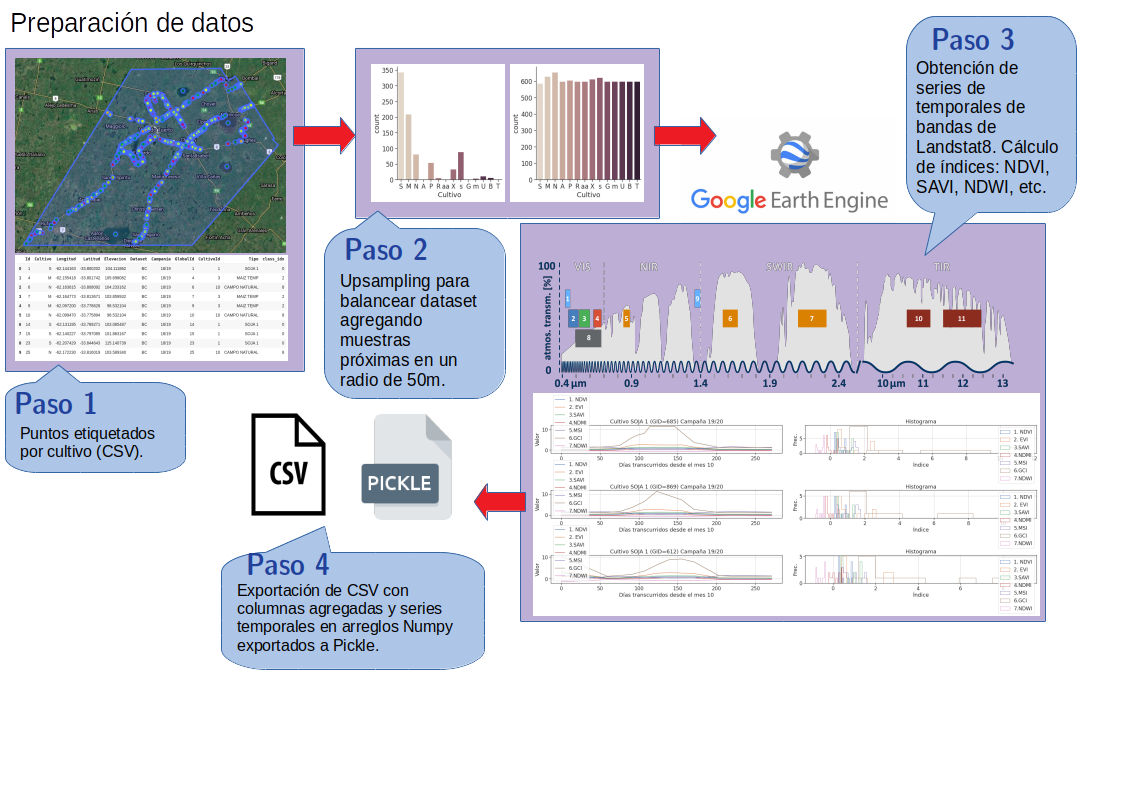

In [ ]:
import abc 

class DataframeAugmenter(object):
    """ Agrega columnas a un Dataframe
    """
    __metaclass__ = abc.ABCMeta  
    
    @abc.abstractmethod
    def get_features(self):
      """ Debe devolver los nombres de las features adicionales.
      """
      raise NotImplementedError
        
    @abc.abstractmethod
    def process_row(self,row):
      """ Función llamada por apply() de pandas para cada fila. 
          Debe devolver los valores de cada columna adicional.
      """
      raise NotImplementedError

La siguiente función aplica todos los ampliadores recibidos como parámetro a un dataset dado y devuelve el dataset aumentado. Debe usarse para train y test porque las nuevas predicciones requerirán estas nuevas columnas.

In [ ]:
def augment_dataset(df, augmenters):
  """
    df: Dataframe a ampliar
    augmenters: Lista de especializaciones de DataframeAugmenter.
  """
  df_aug = df.copy()
  for aug in augmenters:
    df_aug[aug.get_features()] = df_aug.apply(aug.process_row, axis=1, result_type="expand")   
  return df_aug

### 3.1 Clases para ampliación de dataset

A continuación hay distintas especializaciones de *DataframeAugmenter* que amplían el Dataset con información de distintas fuentes:
- Sentinel2 
- Landsat de GEE
- Series temporales de índices.

Se omitieron otras especializaciones que descargaban parches GeoTIFF, destinadas a los modelos basados en CNNs 2D. Éstas se se incluyen en el Anexo.

#### 3.1.1 Bandas de Sentinel2 obtenidas de GEE
Esta función, a partir de una fila del dataset, utiliza la fecha de campaña y la latitud y longitud para obtener una colección de las bandas R,G,B, NIR, SWIR1 y SWIR2 de Sentinel2. Para esa colección calcula el NDVI y construye un mosaico con el valor máximo dentro del percentil 95. Esto último para evitar outliers.

In [ ]:
class Sentinel2Features(DataframeAugmenter):

    def __init__(self):
      pass

    @abc.abstractmethod
    def get_features(self):
      return ["S2_B","S2_G","S2_R","S2_NIR","S2_SWIR1","S2_SWIR2","S2_NDVI"]
        
    @abc.abstractmethod
    def process_row(self,row):
      p = ee.Geometry.Point(float(row['Longitud']),float(row['Latitud']))

      # Obtener fechas iniciales y finales
      year0,year1=row['Campania'].split("/")
      start_date="%d-%02d-%02d" % (2000+int(year0),11,1)
      end_date="%d-%02d-%02d" % (2000+int(year1),4,30)

      s2 = ee.ImageCollection("COPERNICUS/S2_SR") \
                        .filterBounds(p) \
                        .filterDate(start_date, end_date) 

      # Computa NDVI y lo agrega a cada imagen de la collection
      s2_with_ndvi = s2.map(self.s2_add_ndvi)     

      # Crea un mosaico con el pixel que tenga el máximo NDVI
      s2_ndvi_qual = s2_with_ndvi.qualityMosaic('ndvi')

      # Selecciona las bandas y se queda con los valores en percentil 95% para evitar outliers

      # 0 B2 = B "S2_B","
      # 1 B3 = G "S2_G"
      # 2 B4 = R ,"S2_R"
      # 3 B8 = NIR ,"S2_NIR"
      # 4 B11 = SWIR1 ,"S2_SWIR1"
      # 5 B12 = SWIR2 ,"S2_SWIR2"
      # 6
      data = s2_ndvi_qual.select(["B2","B3","B4","B8","B11","B12","ndvi"]).reduceRegion( ee.Reducer.percentile([95]), p, 10 ).getInfo()
      return list(data.values())

    def s2_add_ndvi(self,img):
      # Agrega NDVI a una imagen
      red = ee.Image(img.select('B4'))
      nir = ee.Image(img.select('B8'))
      ndvi = (nir.subtract(red)).divide(nir.add(red)).rename('ndvi')
      return img.addBands(ndvi)     

In [ ]:
# Verificación
row = train_df.iloc[0,:]
s2aug = Sentinel2Features()
S2_B,S2_G,S2_R,S2_NIR,S2_SWIR1,S2_SWIR2,S2_NDVI = s2aug.process_row(row)
S2_B,S2_G,S2_R,S2_NIR,S2_SWIR1,S2_SWIR2,S2_NDVI

(2614, 1158, 115, 377, 73, 6500, 0.9777879118919373)

#### 3.1.2 Series Temporales de Landsat8 descargadas de GEE

Se aplica el mismo concepto que en el caso anterior, pero esta vez almacenando las series temporales de distintos índices (ver sección de índices) en arreglos de Pickle y guardando para cada muestra el nombre del archivo correspondiente.

In [ ]:
class GEELandsat8TimeSeries(DataframeAugmenter):

    def get_indexes_time_series(self,row):      
      campaign = row['Campania']   
      year0 = int(campaign.split("/")[0])
      year1 = int(campaign.split("/")[1])
      ts0 = datetime.combine(datetime(2000+year0, self.start_month, 1), datetime.min.time()).timestamp()/(60*60)
      ts1 = datetime.combine(datetime(2000+year1, self.end_month, 1), datetime.min.time()).timestamp()/(60*60)
      m = int(ts1-ts0)
      raw_dict = ts_extract(lon=row['Longitud'], lat=row['Latitud'], sensor='LC8',
                      start=datetime(2000+year0, self.start_month, 1), 
                      end=datetime(2000+year1, self.end_month, 1),
                      bands =  ['B2', 'B3', 'B4', 'B5', 'B6', 'B7'],
                      radius=self.radius,
                      stats=self.stats)
      
      #x_dates = np.array([get_date(d['id']) for d in raw_dict])
      y = np.array([[datetime.combine(get_date(d['id']), datetime.min.time()).timestamp()/(60*60) - ts0 for d in raw_dict],
                [ndvi(d) for d in raw_dict],
                [evi(d) for d in raw_dict],
                [savi(d) for d in raw_dict],
                [ndmi(d) for d in raw_dict],
                [msi(d) for d in raw_dict],
                [gci(d) for d in raw_dict],
                [ndwi(d) for d in raw_dict]
      ],dtype=float).T

      # Remover NaNs 
      y = y[~np.any(np.isnan(y),axis=1)]

      if y.shape[0] > 2:
        # Remover fechas duplicadas
        y_unique, y_unique_index = np.unique(y[:,0], axis=0, return_index=True)
        y = y[y_unique_index]
        #x_dates = x_dates[y_unique_index]
      else:
        y = None

      return y,m

    def __init__(self,output_path,start_month=10,end_month=6,radius=500,stats="mean",verbose=False):      
      # Crear directorio de salida
      self.output_path = output_path
      if os.path.exists(self.output_path):
        shutil.rmtree(self.output_path)
      os.mkdir( self.output_path )
      self.start_month = start_month
      self.end_month=end_month
      self.radius=radius
      self.stats=stats
      self.n_samples=1024
      self.verbose = verbose
      pass

    @abc.abstractmethod
    def get_features(self):
      return ["ts_filename","n_points"]
        
    @abc.abstractmethod
    def process_row(self,row):
      y,m = self.get_indexes_time_series(row)      

      y_valid = y is not None
      
      if y_valid:
        n_points = y.shape[0]
        t = np.linspace(0,m,self.n_samples)
        ndvi = interp1d(y[:,0], y[:,1], kind='slinear', fill_value="extrapolate")
        evi = interp1d(y[:,0], y[:,2], kind='slinear', fill_value="extrapolate")
        savi = interp1d(y[:,0], y[:,3], kind='slinear', fill_value="extrapolate")
        ndmi = interp1d(y[:,0], y[:,4], kind='slinear', fill_value="extrapolate")
        msi = interp1d(y[:,0], y[:,5], kind='slinear', fill_value="extrapolate")
        cgi = interp1d(y[:,0], y[:,6], kind='slinear', fill_value="extrapolate")
        ndwi = interp1d(y[:,0], y[:,7], kind='slinear', fill_value="extrapolate")

        ts_arr = np.array( [
          ndvi(t),
          evi(t),
          savi(t),
          ndmi(t),
          msi(t),
          cgi(t),
          ndwi(t)
        ]).T
        ts_filename = str(row['GlobalId'])+".pkl"
        full_ts_filename = self.output_path+ts_filename
        with open(full_ts_filename,'wb') as f: pickle.dump(ts_arr, f)
        if self.verbose:
          print(full_ts_filename)
      else:
        print("Salteando GlobalId %d. No hay datos suficientes" % row['GlobalId'])
        full_ts_filename=None
        n_points = None
      return full_ts_filename,n_points

./tmp/1.pkl
16


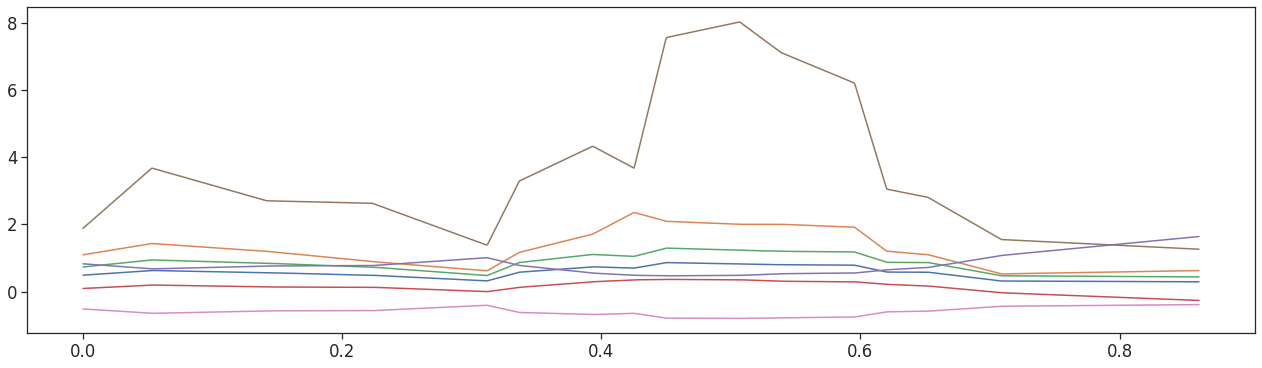

In [ ]:
# Verificación (caso válido)
row = train_df.iloc[0,:]
tsaug = GEELandsat8TimeSeries(output_path = "./tmp/",verbose = True)
ts_filename,n_points = tsaug.process_row(row)
print(n_points)
with open(ts_filename,'rb') as f: ts_arr = pickle.load(f)
t = np.linspace(0,ts_arr[:,0].max(),1024)
plt.figure(figsize=(22,6))
for i in range(7):
  plt.plot(t,ts_arr[:,i])

In [ ]:
# Verificación (caso inválido, devuelve None)
row = train_df.iloc[847,:]
tsaug = GEELandsat8TimeSeries(output_path = "./tmp/",verbose = True)
ts_filename,n_points = tsaug.process_row(row)
ts_filename

Salteando GlobalId 1453. No hay datos suficientes


### 3.2 Agregado de muestras

Para el agregado de muestras se recurrió a un mecanismo sencillo, por falta de familiaridad con técnicas como las descriptas en [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) y librerías como [imbalanced-learn](https://imbalanced-learn.org/stable/). 

El código a continuación agrega muestras aleatorias de puntos próximos de los datos de entrada, con el objetivo de mejorar el entrenamiento del clasificador.

In [ ]:
train_df, class_idx_to_cultivo_id, cultivo_id_to_class_idx,class_idx_to_label= load_train_dataset()
train_df.head()

Unnamed: 0  Id Cultivo  ...  CultivoId           Tipo  class_idx
0           0   1       S  ...          1         SOJA 1          0
1           1   4       M  ...          3      MAIZ TEMP          2
2           2   6       N  ...         10  CAMPO NATURAL          8
3           3   7       M  ...          3      MAIZ TEMP          2
4           4   9       M  ...          3      MAIZ TEMP          2

[5 rows x 12 columns]

In [ ]:
# Cantidad de muestras por clase
samples_per_class = {}
for k,v in train_df.class_idx.value_counts().iteritems():
  class_idx = int(k)
  q = v
  samples_per_class[class_idx] = q
samples_per_class

{0: 344,
 1: 89,
 2: 210,
 3: 4,
 4: 2,
 5: 1,
 6: 6,
 7: 55,
 8: 82,
 9: 6,
 10: 2,
 11: 2,
 12: 34,
 13: 12}

La siguiente función, dada una longitud y latitud, genera una lista de N puntos dentro de un radio suministrado en metros.

In [ ]:
def generate_random_points_in_area(lat,lon,n,radius = 100):  
  r_earth = 6378000  
  lat_min = lat - (radius / r_earth) * (180.0 / np.pi)
  lat_max = lat + (radius / r_earth) * (180.0 / np.pi)
  lon_min = lon - (radius / r_earth) * (180.0 / np.pi) / np.cos(lat * np.pi/180)
  lon_max = lon + (radius / r_earth) * (180.0 / np.pi) / np.cos(lat * np.pi/180)
  lons = np.random.uniform(low=lon_min, high=lon_max, size=n)
  lats = np.random.uniform(low=lat_min, high=lat_max, size=n)
  return lats,lons

La siguiente función recibe un dataframe y genera nuevas muestras para una determinada clase.

In [ ]:
def generate_new_points_for_class(df, class_idx,total_samples_to_generate):
  global last_global_id
  original_samples = df[df.class_idx == class_idx].sample(samples_per_class[class_idx])    
  n = len(original_samples)
  samples_to_generate_per_original_sample = total_samples_to_generate / n
  if samples_to_generate_per_original_sample < 1.0:
    threeshold = 1.0 - total_samples_to_generate / n
  else:
    threeshold = 0.0
    samples_to_generate_per_original_sample = int(np.ceil(total_samples_to_generate / n))
    
  for i in range(n):    
    row = original_samples.iloc[i,:]
    new_rows=original_samples.iloc[[i],] # Fila a copiar
    
    if threeshold > 0.0 :
      if np.random.rand() >= threeshold:
        lats,lons = generate_random_points_in_area(row['Latitud'],row['Longitud'],1,radius = 100)
        new_rows=new_rows.reindex(new_rows.index.repeat(1)) 
        new_rows.loc[:,'class_idx'] = class_idx
        new_rows.loc[:,'Latitud'] = lats
        new_rows.loc[:,'Longitud'] = lons
        global_ids  = [last_global_id + 1 + i for i in range(1)]
        last_global_id = np.max(global_ids)
        new_rows.loc[:,'GlobalId'] = global_ids
        df = df.append(new_rows)
    else:
      lats,lons = generate_random_points_in_area(row['Latitud'],row['Longitud'],samples_to_generate_per_original_sample,radius = 100)
      new_rows=new_rows.reindex(new_rows.index.repeat(samples_to_generate_per_original_sample)) 
      new_rows.loc[:,'class_idx'] = class_idx
      new_rows.loc[:,'Latitud'] = lats
      new_rows.loc[:,'Longitud'] = lons
      global_ids = [last_global_id + 1 + i for i in range(samples_to_generate_per_original_sample)]
      last_global_id = np.max(global_ids)
      new_rows.loc[:,'GlobalId'] = global_ids
      df = df.append(new_rows)
  return df

Se utiliza la función anterior para balancear todas las clases en cantidad de muestras (se busca aproximarlas a una misma cantidad).

In [ ]:
train_df_tmp = train_df.copy()
last_global_id = train_df_tmp['GlobalId'].max()
minimum_samples_per_class = 600
for class_idx in samples_per_class.keys():  
  train_df_tmp = generate_new_points_for_class(train_df_tmp,class_idx,minimum_samples_per_class - samples_per_class[class_idx])
sns.catplot(x="Cultivo", kind="count", palette="ch:.25", data=train_df_tmp) 

In [ ]:
len(train_df_tmp)

8514

Por último, se almacena en Google Drive para ensayos posteriores.

In [ ]:
train_df_tmp.to_csv(GOOGLE_DRIVE_DATA_PATH+'train_expanded_balanced.csv')

In [ ]:
# Verificación de duplicados
np.any(train_df_tmp['GlobalId'].duplicated())

False

### 3.3 Datasets ampliados con nuevas features

A continuación se amplia el CSV del dataset original con nuevas características usando los ampliadores de la sección anterior. 

#### 3.2.1 Dataset ampliado con bandas de Sentinel2 v1

Se aplica sobre las muestras del dataset original para uso en ingeniería de features (se utilizó también para entrenar modelos de clasificadores que no se continuaron desarrollando: Random Forest, SVM; XGBoost).

In [ ]:
train_df, class_idx_to_cultivo_id, cultivo_id_to_class_idx,class_idx_to_label= load_train_dataset()
train_df_aug = augment_dataset(train_df,[Sentinel2Features()])
train_df_aug.to_csv(GOOGLE_DRIVE_DATA_PATH+'train_s2_v1.csv')
train_df_aug

Nota: el link público (Google Drive) de este archivo es: [train_s2_v1.csv](https://drive.google.com/file/d/1-7_luaV40CCK4t3tyds33KYrYQqK_POu/view?usp=sharing).

#### 3.2.2 Dataset ampliado con series temporales para diversos índices obtenidas de Landsat8 con GEE almacenadas con Pickle en archivos externos.

Se aplica sobre las muestras del dataset ampliado para entrenamiento del modelo de CNN1D seleccionado y se guardan los resultados en Google Drive.

In [ ]:
!gdown --id 1jh_JBSjVZwh9vvlXP7XT2yc5QvrJlzaD

Downloading...
From: https://drive.google.com/uc?id=1jh_JBSjVZwh9vvlXP7XT2yc5QvrJlzaD
To: /content/train_expanded_balanced.csv
100% 802k/802k [00:00<00:00, 53.2MB/s]


In [ ]:
train_df = pd.read_csv(GOOGLE_DRIVE_DATA_PATH+'train_expanded_balanced.csv')
train_df_aug = augment_dataset( train_df,
      [
        GEELandsat8TimeSeries( 
            output_path = "./train_expanded_balanced_timeseries_pickle/",
            verbose = False )
      ]
)

Salteando GlobalId 1451. No hay datos suficientes
Salteando GlobalId 1452. No hay datos suficientes
Salteando GlobalId 1453. No hay datos suficientes
Salteando GlobalId 3053. No hay datos suficientes
Salteando GlobalId 3054. No hay datos suficientes
Salteando GlobalId 3055. No hay datos suficientes
Salteando GlobalId 3056. No hay datos suficientes
Salteando GlobalId 3057. No hay datos suficientes
Salteando GlobalId 3058. No hay datos suficientes
Salteando GlobalId 3059. No hay datos suficientes
Salteando GlobalId 3172. No hay datos suficientes
Salteando GlobalId 3173. No hay datos suficientes
Salteando GlobalId 3174. No hay datos suficientes
Salteando GlobalId 3175. No hay datos suficientes
Salteando GlobalId 3176. No hay datos suficientes
Salteando GlobalId 3177. No hay datos suficientes
Salteando GlobalId 3178. No hay datos suficientes
Salteando GlobalId 3221. No hay datos suficientes
Salteando GlobalId 3222. No hay datos suficientes
Salteando GlobalId 3223. No hay datos suficientes


Dado que para algunos puntos no habían muestras, se eliminan del dataset de entrenamiento.

In [ ]:
np.where(train_df_aug['ts_filename'].isna())

(array([ 845,  846,  847, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2565,
        2566, 2567, 2568, 2569, 2570, 2571, 2614, 2615, 2616, 2617, 2618,
        2619, 2620]),)

In [ ]:
train_df_aug = train_df_aug[train_df_aug['ts_filename'].notna()]
np.where(train_df_aug['ts_filename'].isna())

(array([], dtype=int64),)

In [ ]:
train_df_aug.to_csv(GOOGLE_DRIVE_DATA_PATH+'train_expanded_balanced_timeseries_pickle.csv')
!tar -czf drive/MyDrive/train_expanded_balanced_timeseries_pickle.tar.gz ./train_expanded_balanced_timeseries_pickle/  

Mismo proceso para datos de test.

In [ ]:
test_df_aug = augment_dataset( test_df,
      [
        GEELandsat8TimeSeries( 
            output_path = "./test_timeseries_pickle/",
            verbose = False )
      ]
)

In [ ]:
np.where(test_df_aug['ts_filename'].isna())

(array([], dtype=int64),)

In [ ]:
test_df_aug.to_csv(GOOGLE_DRIVE_DATA_PATH+'test_timeseries_pickle.csv')
!tar -czf drive/MyDrive/test_timeseries_pickle.tar.gz ./test_timeseries_pickle/  

Nota: como este proceso es lento y puede tomar horas se proporcionan los links públicos (Google Drive) de los archivos generados:
- CSV (Train): [train_expanded_balanced_timeseries_pickle.csv](https://drive.google.com/file/d/1-1paK2fE-MnT1jsy8poc8Qt68lE8QBxT/view?usp=sharing)
- CSV (Test): [test_timeseries_pickle.csv](https://drive.google.com/file/d/1-9C7J4oqm4RPa2qdR1wcbU822j4b5K0v/view?usp=sharing)
- Series (Train): [train_expanded_balanced_timeseries_pickle.tar.gz](https://drive.google.com/file/d/1-26vVpCue-dGb6iGzSxk_X3UaFKmZ3uP/view?usp=sharing)
- Series (Test): [test_timeseries_pickle.tar.gz](https://drive.google.com/file/d/1-Exvxwas8xau7s-hwmO9PEGoFS3wBBRi/view?usp=sharing)

## 4. Ingeniería de Features Básica

En este apartado se hace un estudio preliminar sencillo de la sensibilidad de cada clase a los valores de las bandas o índices. Sólo se incluyen los resultados para la información obtenida de Sentinel2.

In [ ]:
!gdown --id 1-7_luaV40CCK4t3tyds33KYrYQqK_POu

Downloading...
From: https://drive.google.com/uc?id=1-7_luaV40CCK4t3tyds33KYrYQqK_POu
To: /content/train_s2_v1.csv
100% 113k/113k [00:00<00:00, 41.9MB/s]


In [ ]:
df = pd.read_csv('/content/train_s2_v1.csv')

In [ ]:
feature_cols_s2 = ["S2_B","S2_G","S2_R","S2_NIR","S2_SWIR1","S2_SWIR2","S2_NDVI"] # Sentinel2
feature_cols_ls = ["LS_B","LS_G","LS_R","LS_NIR","LS_SWIR1","LS_SWIR2","LS_NDVI"] # LandSat
feature_cols_ls_s2 = feature_cols_s2 + feature_cols_ls
feature_cols = feature_cols_s2 # feature_cols_ls_s2

In [ ]:
n = len(feature_cols) + (len(feature_cols) & 1)

n_cols = 4
n_rows = int(np.ceil(n / n_cols))
fig, axes = plt.subplots(n_rows,n_cols,figsize=(22,8))
fig.suptitle("Distribución de valores por banda")
for i in range(len(feature_cols)):    
    iy = int(i/n_cols)
    ix = i % n_cols
    axes[iy][ix].grid(which='Both')
    axes[iy][ix].set_title(feature_cols[i])
    axes[iy][ix].hist(df[feature_cols[i]])
plt.tight_layout()
plt.show()

### Análisis de correlación

Se realiza One Hot Encoding para discriminar cómo influye cada parámetro de entrada en cada clase de salida.

In [ ]:
cultivo_dummies = pd.get_dummies(df.Cultivo,prefix='c_')
df = pd.concat([df,cultivo_dummies], axis=1)
df.dropna(axis=1, how='all')
df

Unnamed: 0   Id Cultivo   Longitud  ...  c__X  c__aa c__m c__s
0             0    1       S -62.144163  ...     0      0    0    0
1             1    4       M -62.155418  ...     0      0    0    0
2             2    6       N -62.163615  ...     0      0    0    0
3             3    7       M -62.164773  ...     0      0    0    0
4             4    9       M -62.097200  ...     0      0    0    0
..          ...  ...     ...        ...  ...   ...    ...  ...  ...
845         845  467       U -61.607786  ...     0      0    0    0
846         846  469       N -62.245215  ...     0      0    0    0
847         847  470       N -61.480817  ...     0      0    0    0
848         848  471       N -61.470679  ...     0      0    0    0
849         849  473       N -61.780876  ...     0      0    0    0

[850 rows x 31 columns]

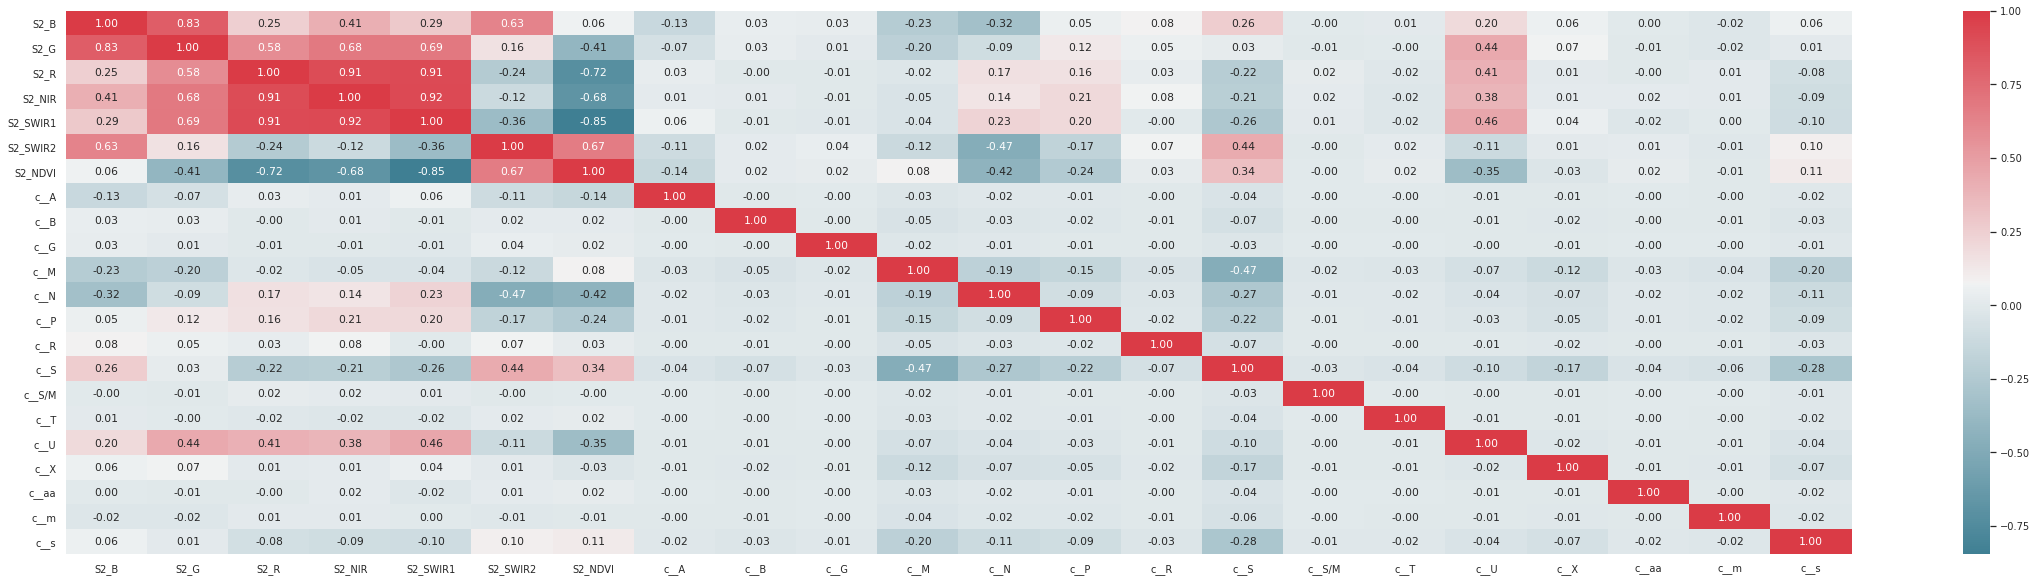

In [ ]:
exclude_corr_cols = [ 'Unnamed: 0', 'Id',	'Cultivo', 'Longitud', 'Latitud', 'Elevacion', 'Dataset', 'Campania', 'GlobalId']
corr_cols = [x for x in df.columns if x not in exclude_corr_cols]
fig, ax1 = plt.subplots(1, figsize=(40,10))
df_corr = df[corr_cols]
corr = df_corr.corr() # Todo combinar con Y_train
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

A modo de primer conclusión, parece posible discriminar algunas de las clases por los valores de estos indicadores utilizando un algoritmo de la familia de los árboles de decisión (incluyendo sus variantes o implementaciones más avanzadas Random Forest, XGBoost, etc.). 

Para algunas clases es posible establecer algunas 

- Soja (S y s): correlación con  infrarojos, el azul y el NDVI.
- Maíz (M y m): Valores más bajos de azul y verde.
- Forrajes, pasturas verdeos (P): alta presencia de infrarojos.
- Campo Natural (N): influído por todas las bandas.
- Agua (A): baja presencia de infrarojos.
- Urbano (U): correlación positiva alta con Verde y Rojo, NDVI negativo.

Mientras que para otras parece ser necesaria información adicional:

- Trigo (T)
- Girasol (G)
- Barbecho (B)
- No sabe (X)
- Alfalfa (aa)
- Sorgo (R)

Una posible estrategia para un clasificador es plantear un ensamble que utilice los indicadores para las clases del primer grupo y otros métodos complementarios (por ejemplo utilizando parches RGB y una red convolucional o series temporales que exhiban patrones distintivos en la evolución de esos cultivos) para los del segundo grupo. 

### Análisis por Random Forest

Otro método para obtener aquellas características que influyan más en el resultado es aprovechando la selección de parámetros que hace el algoritmo Random
Forest.

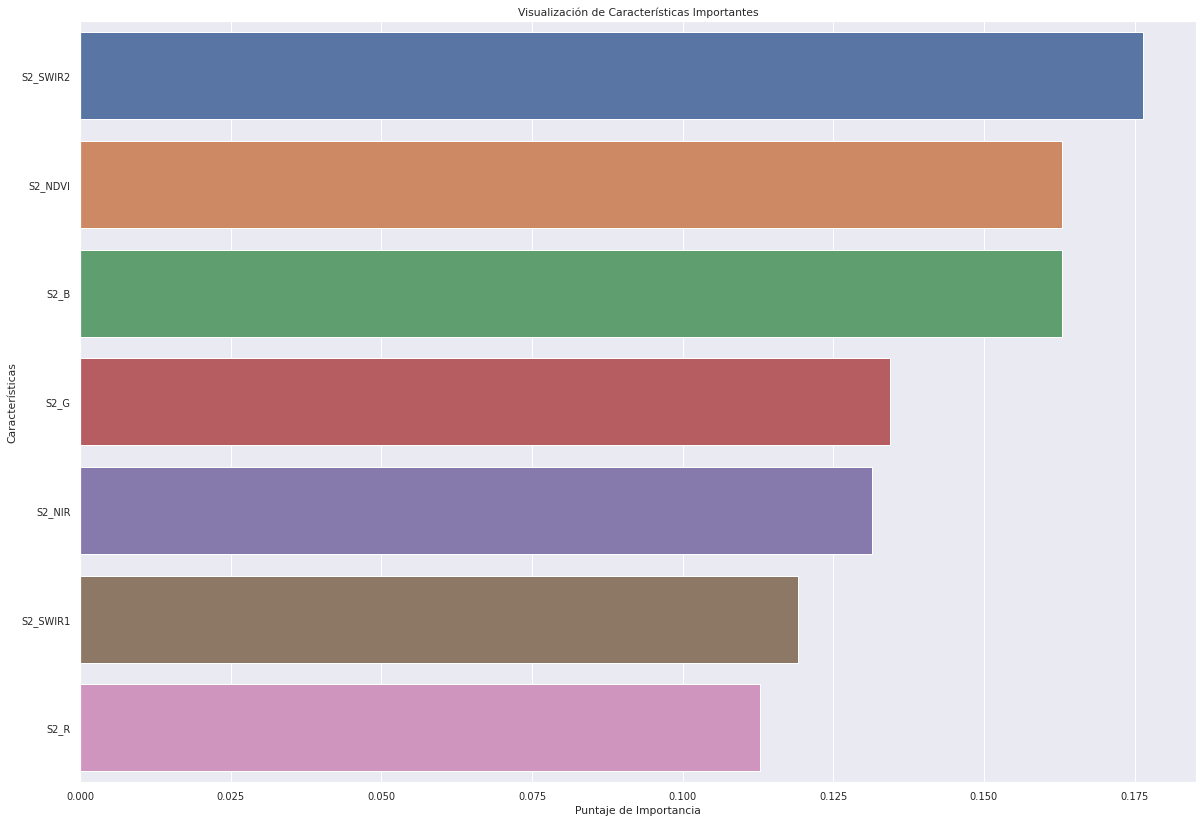

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
oob_score=False, random_state=None, verbose=0,
warm_start=False)
clf.fit(df[feature_cols],df['Cultivo'])
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(20,14))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Puntaje de Importancia')
plt.ylabel('Características')
plt.title("Visualización de Características Importantes")
plt.show()

Esto confirma la importancia de la información del infrarojo para la separación de clases.

## 5. Desarrollo y Entrenamiento del Modelo Presentado

Como se mencionó anteriormente, el procedimiento para generar el modelo que se describe a continuación es el correspondiente al que exhibió un mejor desempeño (aún cuando luego se corroboró un grado no despreciable de overfitting en los resultados finales). 
Las aproximaciones descartadas ensayaron métodos clásicos de clasificadores supervisados y redes convolucionales que utilizan parches de imágenes. Para los primeros el máximo puntaje obtenido fue:

Modelo                  | Balanced Accuracy
----------------------- | -----------------
XGBoost                 | 0.292494
SVM                     | 0.266322	
RandomForest            | 0.261431	
Ensemble (*)            | 0.250531	
Dummy (baseline)        | 0.090909

(*) Ensamble de XGBoos, SVM y RandomForest.

Para los modelos de CNN 2D la métrica 'Balanced Accuracy' tuvo valores aún más bajos pero ésto también debido a que no se llegaron a sortear algunas dificultades en la obtención de parches de una resolución aceptable y libres de defectos (nubes, píxeles faltantes, etc.) por falta de conocimiento de GEE y por no haber utilizado las librerías apropiadas. Al ser muy baja la resolución, se obtenían parches donde las diferencias entre píxeles eran mínimas y no permitían sacar provecho de las capacidades de los filtros de las redes de convolución. 

Ejemplo de GeoTIFF descarada (código para generar la colección en Anexo).

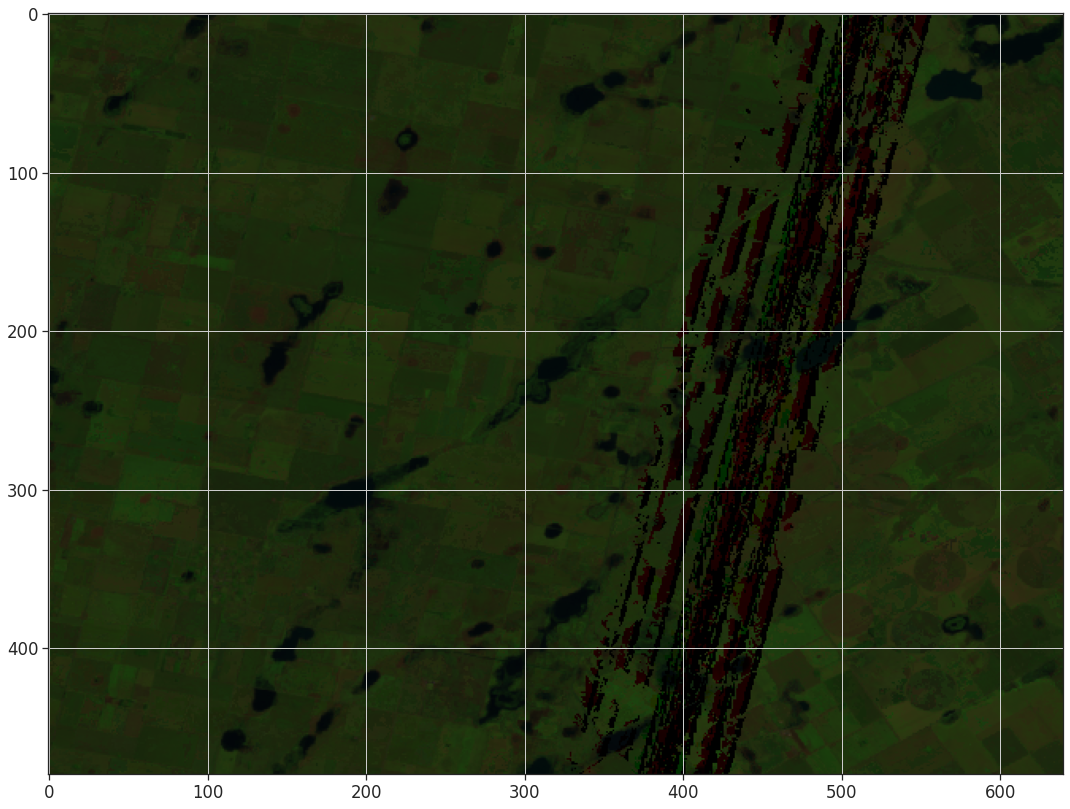

In [ ]:
from IPython.display import Image 
Image(filename='/content/DesafioAgTech2020/resultado/geotiff_example.png')

Es importante aclarar que no se dedicó esfuerzo a mejorar el procedimiento de obtención de estas imágenes al decidir otra aproximación. En lugar de buscar la imagen con mayor NDVI y generar a partir de esa imagen los índices u otros parámetros de interés, se tomaron intervalos de tiempo más grandes para intentar clasificar las curvas de la evolución de los indicadores de salubridad de la vegetación (y otros). Cada muestra contendría una estadística de cada indicador para un área pequeña que contenga cada punto de interés.

Algunos ejemplos de clasificación de actividades motrices en personas utilizando información de sensores están disponibles junto al dataset público [Wireless Sensor Data de Kaggle](https://www.kaggle.com/paulopinheiro/wireless-sensor-data). Muchas de ellas utilizan redes convolucionales 1D, que permiten encontrar patrones señales y son invariantes a que se encuentren desfasados o con diferencias de amplitud, ligeramente deformadas, etc.

#### CNN 1D para clasificación de series temporales

Se optó por implementar un clasificador de una arquitectura similar a la que se muesta en la figura:

<img src="https://www.mdpi.com/sensors/sensors-19-00275/article_deploy/html/images/sensors-19-00275-g003.png"/>

Fuente: [A Self-Adaptive 1D Convolutional Neural Network for Flight-State Identification](https://www.mdpi.com/1424-8220/19/2/275/htm)

Estas redes aprenden los coeficientes de los filtros a aplicar a una señal de entrada que maximicen la capacidad de discriminarlas. Existen variantes que utilizan distintos tamaños de filtro en paralelo en la entrada (multiheaded) con el objetivo de mejorar esta capacidad de discriminación, pero en este trabajo se utilizó una arquitectura básica y sólo se experimentó variando la cantidad de capas y neuronas.


### 5.1 Métricas de evaluación

Uno de los requerimientos para este trabajo es utilizar una métrica adecuada para un problema en el cuál las clases están desbalanceadas.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow import keras
from datetime import datetime

Dado que Keras -a diferencia de SKLearn- no cuenta con la métrica [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) se implementa la misma a partir de [keras.metrics.SparseCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy)

In [ ]:
class BalancedSparseCategoricalAccuracy(keras.metrics.SparseCategoricalAccuracy):
    def __init__(self, name='balanced_sparse_categorical_accuracy', dtype=None):
        super().__init__(name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_flat = y_true
        if y_true.shape.ndims == y_pred.shape.ndims:
            y_flat = tf.squeeze(y_flat, axis=[-1])
        y_true_int = tf.cast(y_flat, tf.int32)

        cls_counts = tf.math.bincount(y_true_int)
        cls_counts = tf.math.reciprocal_no_nan(tf.cast(cls_counts, self.dtype))
        weight = tf.gather(cls_counts, y_true_int)
        return super().update_state(y_true, y_pred, sample_weight=weight)

### 5.2 Entrenamiento del modelo




#### 5.2.1 Carga del dataset

En caso de que se desee sólo ensayar el entrenamiento/evaluación del modelo sin haber ejecutado las secciones previas, se pueden descargar los datos de Google Drive. Si ya se ejecutaron los pasos anteriores, esto no es necesario.

Descargar CSV ampliado para entrenamiento.

In [ ]:
!gdown --id 1-1paK2fE-MnT1jsy8poc8Qt68lE8QBxT

Downloading...
From: https://drive.google.com/uc?id=1-1paK2fE-MnT1jsy8poc8Qt68lE8QBxT
To: /content/train_expanded_balanced_timeseries_pickle.csv
100% 1.34M/1.34M [00:00<00:00, 84.5MB/s]


In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/train_expanded_balanced_timeseries_pickle.csv')

Descargar series en formato Pickle (numpy arrays).

In [ ]:
!gdown --id 1-26vVpCue-dGb6iGzSxk_X3UaFKmZ3uP

Downloading...
From: https://drive.google.com/uc?id=1-26vVpCue-dGb6iGzSxk_X3UaFKmZ3uP
To: /content/train_expanded_balanced_timeseries_pickle.tar.gz
464MB [00:02, 229MB/s]


In [ ]:
!tar -xf train_expanded_balanced_timeseries_pickle.tar.gz 

Descargar [class_idx_to_cultivo_id.pkl](https://drive.google.com/file/d/1-7CkLQ6aoX9aSz1VrdoSexlqIUkc_GQP/view?usp=sharing)

In [ ]:
!gdown --id 1-7CkLQ6aoX9aSz1VrdoSexlqIUkc_GQP

Downloading...
From: https://drive.google.com/uc?id=1-7CkLQ6aoX9aSz1VrdoSexlqIUkc_GQP
To: /content/class_idx_to_cultivo_id.pkl
100% 36.0/36.0 [00:00<00:00, 26.3kB/s]


In [ ]:
import pickle
with open('/content/class_idx_to_cultivo_id.pkl', 'rb') as f:
  class_idx_to_cultivo_id = pickle.load(f)

In [ ]:
NUM_CLASSES = len(class_idx_to_cultivo_id)
SAMPLE_SIZE = 1024
CLIPPED_SAMPLE_SIZE = 800-400
NUM_CLASSES,SAMPLE_SIZE

(14, 1024)

Verificación.

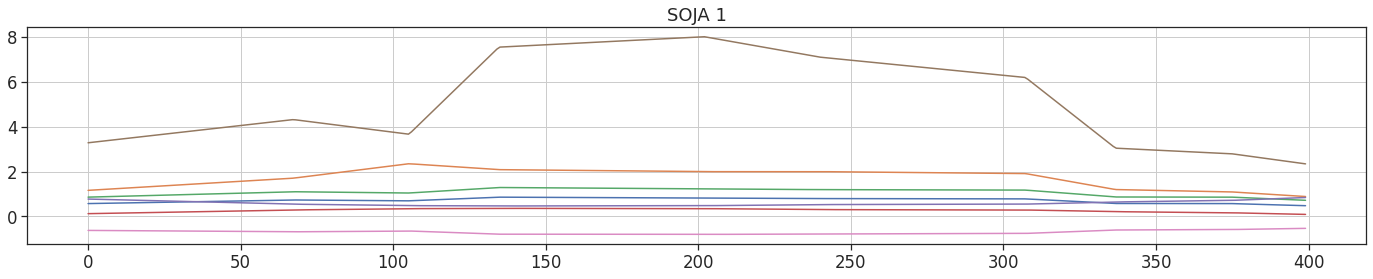

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

total_samples = len(train_df)
#X = np.zeros(shape=(total_samples,SAMPLE_SIZE,7))
X = np.zeros(shape=(total_samples,CLIPPED_SAMPLE_SIZE,7))
y = np.zeros(total_samples)
for i in range(total_samples):
  row = train_df.iloc[i,:]
  with open(row['ts_filename'],'rb') as f: 
    a = pickle.load(f)
    X[i] = a[400:800,:]  
    #X[i] = a[:,:]  
  y[i] = row['class_idx']  
X.shape,y.shape  

row_idx=0
plt.figure(figsize=(24,4))
plt.title(train_df.iloc[row_idx,:]["Tipo"])
plt.grid(which="Both")
plt.plot(X[row_idx])
plt.show()

Para facilitar la convergencia de la CNN, se estandarizan los valores de las series temporales. El scaler se almacena para luego utilizarlo en las predicciones.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

In [ ]:
with open(GOOGLE_DRIVE_DATA_PATH+'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

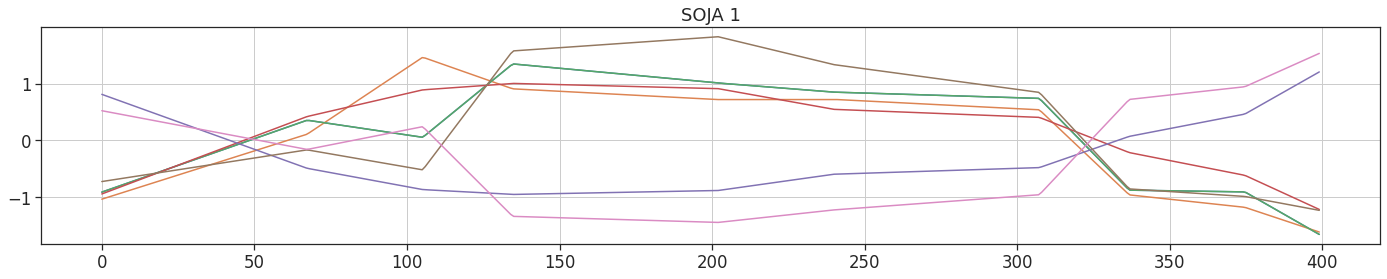

In [ ]:
row_idx=0
plt.figure(figsize=(24,4))
plt.title(train_df.iloc[row_idx,:]["Tipo"])
plt.grid(which="Both")
plt.plot(X[row_idx])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SPLIT = 0.3
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SPLIT, random_state=1)

In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

#### 5.2.2 Arquitectura

Luego de ensayar con distintos hiperparámetros, cantidad y tipo de capas, neuronas, se optó por utilizar uno de los modelos más básicos (no se llegó a incorporar ningún método automático para optimizacón de HPs del tipo de Hyperopt, Optuna, AutoML, etc.)

Se utilizó un modelo de dos capas con la misma estructura:
- 64 filtros de dimensión 3.
- Dropout 50%
- Pooling de dimensión 2.

y una capa densa de 128 neuronas.

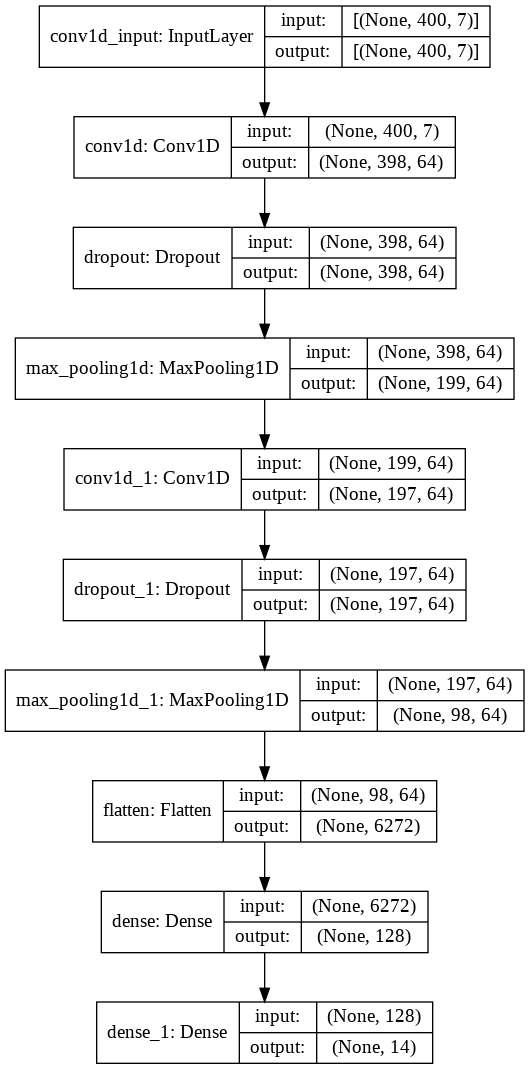

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D,Dropout,MaxPooling1D,Flatten,Dense

def make_model(input_shape):
  model = Sequential()
  
  # Conv1
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))

  # Conv2
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation='softmax'))
  return model


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
import tensorflow as tf
num_epochs = 15
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_1dcnn_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model = make_model(input_shape=x_train.shape[1:])
model.compile(    
    optimizer = keras.optimizers.Adam(),
    #optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-4, momentum=0.9, nesterov=True),
    loss="sparse_categorical_crossentropy",    
    metrics= [BalancedSparseCategoricalAccuracy()]
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/15
149/149 [==============================] - 9s 52ms/step - loss: 1.5991 - balanced_sparse_categorical_accuracy: 0.5025 - val_loss: 1.0071 - val_balanced_sparse_categorical_accuracy: 0.7699
Epoch 2/15
149/149 [==============================] - 8s 52ms/step - loss: 0.6051 - balanced_sparse_categorical_accuracy: 0.8022 - val_loss: 0.7726 - val_balanced_sparse_categorical_accuracy: 0.8088
Epoch 3/15
149/149 [==============================] - 8s 51ms/step - loss: 0.4045 - balanced_sparse_categorical_accuracy: 0.8641 - val_loss: 0.6803 - val_balanced_sparse_categorical_accuracy: 0.8607
Epoch 4/15
149/149 [==============================] - 8s 52ms/step - loss: 0.3607 - balanced_sparse_categorical_accuracy: 0.8797 - val_loss: 0.5826 - val_balanced_sparse_categorical_accuracy: 0.8608
Epoch 5/15
149/149 [==============================] - 8s 52ms/step - loss: 0.2892 - balanced_sparse_categorical_accuracy: 0.8934 - val_loss: 0.5299 - val_balanced_sparse_categorical_accuracy: 0.8726
Epoch

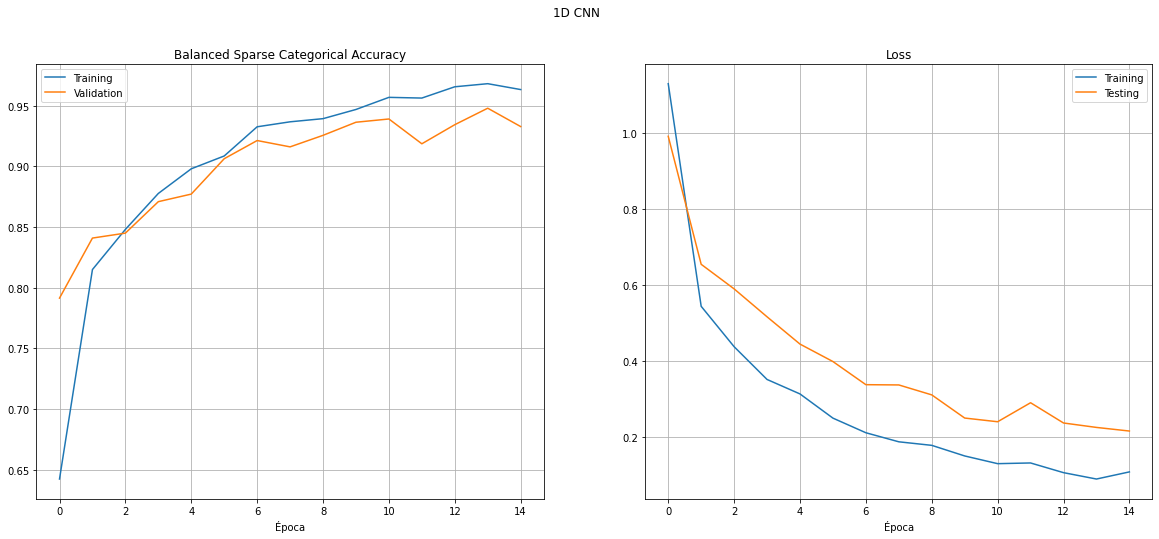

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(20,8))
plt.suptitle("1D CNN")
axes[0].set_title("Balanced Sparse Categorical Accuracy")
axes[0].plot(np.arange(num_epochs),history.history['balanced_sparse_categorical_accuracy'])
axes[0].plot(np.arange(num_epochs),history.history['val_balanced_sparse_categorical_accuracy'])
axes[0].legend(["Training","Validation"])
axes[0].grid(which="Both")
axes[0].set_xlabel("Época")
axes[1].set_title("Loss")
axes[1].plot(np.arange(num_epochs),history.history['loss'])
axes[1].plot(np.arange(num_epochs),history.history['val_loss'])
axes[1].legend(["Training","Testing"])
axes[1].grid(which="Both")
axes[1].set_xlabel("Época")
plt.show()

Luego de repetidos experimentos se observó que el aprendizaje llegaba a una meseta cerca del 93% (en este caso a partir de la época 15, motivo por el cuál se detuvo en ese punto). Se probó modificando parámetros de aprendizaje, obteniendo un desempeño similar.

In [ ]:
from sklearn.metrics import balanced_accuracy_score 

y_pred_val = np.argmax(model.predict(x_val), axis=1)
balanced_accuracy_score(y_val, y_pred_val)

0.9337701391473655

## 6. Resultados y conclusiones

### 6.1 Análisis

A continuación se muestran los resultados de la matriz de confusión.


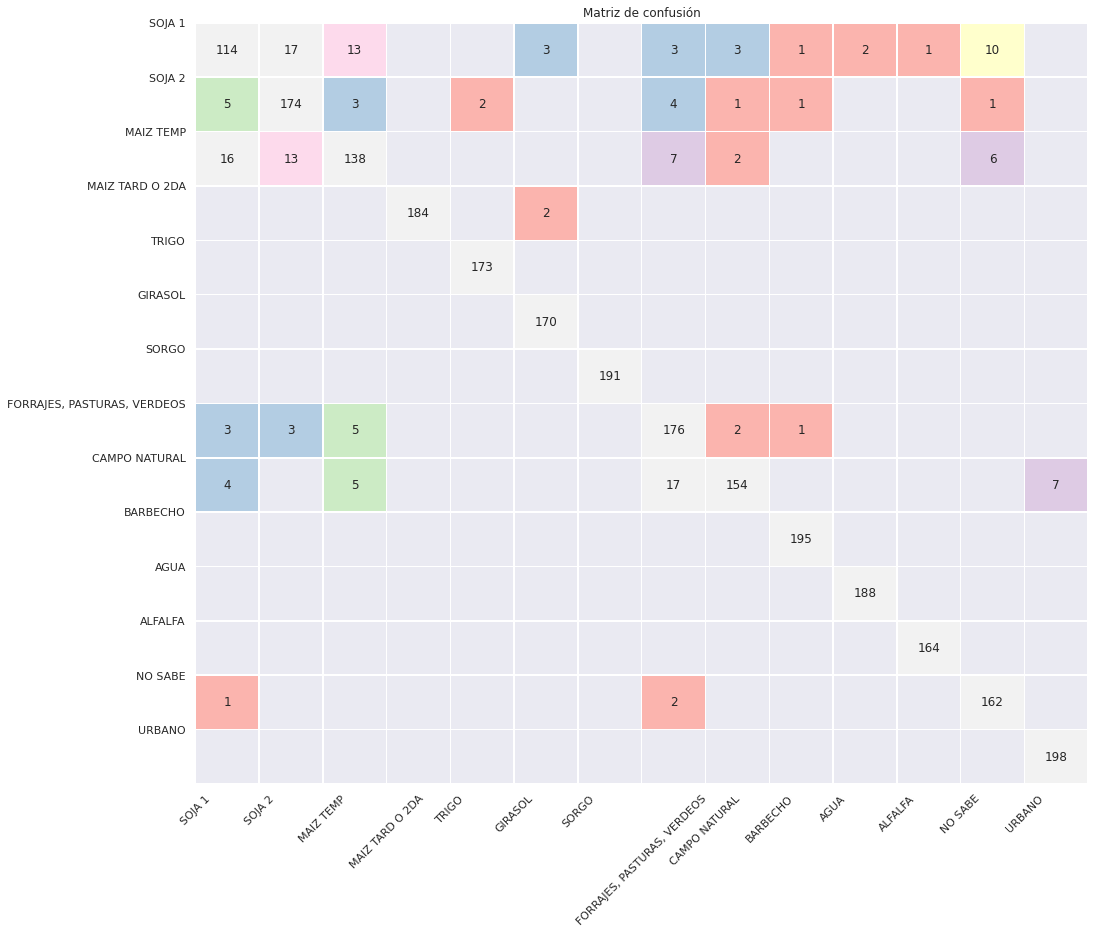

                             precision    recall  f1-score   support

                     SOJA 1       0.80      0.68      0.74       167
                     SOJA 2       0.84      0.91      0.87       191
                  MAIZ TEMP       0.84      0.76      0.80       182
            MAIZ TARD O 2DA       1.00      0.99      0.99       186
                      TRIGO       0.99      1.00      0.99       173
                    GIRASOL       0.97      1.00      0.99       170
                      SORGO       1.00      1.00      1.00       191
FORRAJES, PASTURAS, VERDEOS       0.84      0.93      0.88       190
              CAMPO NATURAL       0.95      0.82      0.88       187
                   BARBECHO       0.98      1.00      0.99       195
                       AGUA       0.99      1.00      0.99       188
                    ALFALFA       0.99      1.00      1.00       164
                    NO SABE       0.91      0.98      0.94       165
                     URBANO      

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report

target_names = [class_idx_to_label[i] for i in range(14)]

con_matrix = confusion_matrix(y_val, y_pred_val)

sns.set()
my_mask = np.zeros((con_matrix.shape[0], con_matrix.shape[0]), dtype=int)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[0]):
        my_mask[i][j] = con_matrix[i][j] == 0 

fig_dims = (16, 14)
plt.subplots(figsize=fig_dims)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, cmap="Pastel1", cbar=False, mask=my_mask, vmax=15)
plt.title("Matriz de confusión")
plt.xticks(range(len(target_names)), target_names, rotation=45)
plt.yticks(range(len(target_names)), target_names, rotation='horizontal')
plt.show()
print(classification_report(y_val, y_pred_val, target_names=target_names))

Nuevamente, la información presentada está afectada por el overfitting introducido al sumar muestras de los datos de entrenamiento muy próximas a los puntos originales, pero aún así se puede concluir que es necesario mejorar la discriminación de los tipos de soja, maiz y forrajes/pasturas/verdeos. 


### 6.2 Conclusiones y lineamientos para trabajo futuro

- El puntaje obtenido 0.93 difiere mucho del público (0.45) y del puntaje privado final (0.5). Uno de los errores cometidos es que se generó overfitting al agregar puntos próximos a los originales del dataset y luego repartirlos entre entrenamiento y validación. Este error se cometió por no saber como proceder con las clases para las que se tienen muy pocas muestras (en algunos casos sólo una muestra), pero se podría haber hecho un particionamiento distinto eligiendo la mejor estrategia para cada caso (podía evitar este error para soja, maiz, y otras clases con más de 50 muestras). Se espera no repetirlo en el futuro utilizando técnicas como las descriptas en [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) y librerías como [imbalanced-learn](https://imbalanced-learn.org/stable/). 
- Aún así el uso de series temporales parece dar buenos resultados y puede continuarse utilizando series temporales de parches (los denominados [tubelets](https://arxiv.org/abs/1604.02532) y otros tipos de arquitecturas más avanzadas (RNN, LSTM, etc.). Se presenta un resumen de algunos de estos métodos en [Deep learning for time series classification: a review](https://arxiv.org/pdf/1809.04356.pdf).
- La selección de hiperparámetros (incluyendo preparación del dataset, arquitectura, y entrenamiento) se hizo de forma manual, por prueba y error. Este aspecto puede mejorarse con el uso de librerías como [hyperopt](https://github.com/hyperopt/hyperopt), [optuna](https://optuna.org/). Se considerarán estas librerías para trabajos futuros, así como las técnicas de [Automated Machine Learning](https://www.automl.org/).
- Se ensayaron dos tipos de ensamble. Un votador (implementado con SKLearn) y un mecanismo Ad-Hoc que aplicaba una máscara a los resultados por debajo de un umbral, para completarlos con los de otro clasificador. Este método se utilizó para combinar XGBoost con los algunas de las CNNs 2D. Quedó trabajo pendiente en un uso adecuado de los ensambles combinado con un análisis de las clases que el clasificador no resolvió correctamente.

## 7. Preparación de submisión para evaluación

Se incluye el código para generar el archivo subido a la competencia (sólo cambia el postfijo: fecha y hora actual y puntaje).
El archivo con el mayor puntaje público de los ensayados con el modelo 1DCNN que se subió a la competencia es submit_CNN1D_12_10_2020_02_03_24_0.45417197181903063.csv (0.45417197181903063 es el puntaje público).

- Subir resultados: https://metadata.fundacionsadosky.org.ar/upload/22/
- Leaderboard: https://metadata.fundacionsadosky.org.ar/competition/22/

Nota: los links públicos (Google Drive) de estos archivos son:
- CSV (Test): [test_timeseries_pickle.csv](https://drive.google.com/file/d/1-9C7J4oqm4RPa2qdR1wcbU822j4b5K0v/view?usp=sharing)
- Series (Test): [test_timeseries_pickle.tar.gz](https://drive.google.com/file/d/1-Exvxwas8xau7s-hwmO9PEGoFS3wBBRi/view?usp=sharing)
- Scaler [scaler.pkl](https://drive.google.com/file/d/1-W2HvEyM20p5IqIbKTneLxeCsE2_LUeo/view?usp=sharing)

In [ ]:
!gdown --id 1-9C7J4oqm4RPa2qdR1wcbU822j4b5K0v

Downloading...
From: https://drive.google.com/uc?id=1-9C7J4oqm4RPa2qdR1wcbU822j4b5K0v
To: /content/test_timeseries_pickle.csv
100% 61.6k/61.6k [00:00<00:00, 4.14MB/s]


In [ ]:
eval_df = pd.read_csv('/content/test_timeseries_pickle.csv')

In [ ]:
!gdown --id 1-Exvxwas8xau7s-hwmO9PEGoFS3wBBRi

Downloading...
From: https://drive.google.com/uc?id=1-Exvxwas8xau7s-hwmO9PEGoFS3wBBRi
To: /content/test_timeseries_pickle.tar.gz
30.3MB [00:00, 73.2MB/s]


In [ ]:
!tar -xf /content/test_timeseries_pickle.tar.gz

In [ ]:
!gdown --id 1gV4UtL6brZU0jVosD8ndI_bfrCyx1WaW

Downloading...
From: https://drive.google.com/uc?id=1gV4UtL6brZU0jVosD8ndI_bfrCyx1WaW
To: /content/scaler.pkl
100% 687/687 [00:00<00:00, 1.09MB/s]


Descargar el scaler (sólo si no se hizo anteriormente o no se ejecutaron las celdas de entrenamiento).

In [ ]:
with open('/content/scaler.pkl', 'rb') as f:
  scaler = pickle.load(f)

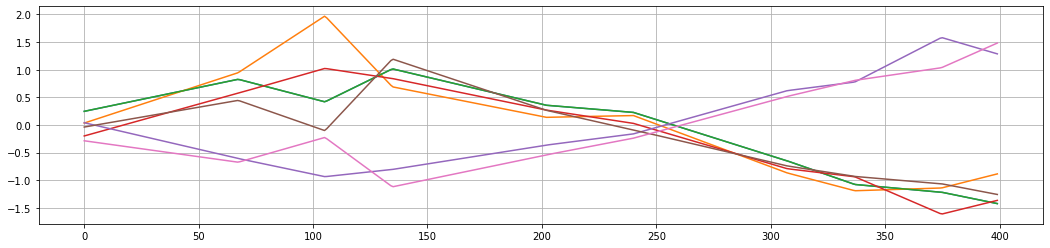

In [ ]:
total_test_samples = len(eval_df)
X_eval= np.zeros(shape=(total_test_samples,CLIPPED_SAMPLE_SIZE,7))
for i in range(total_test_samples):
  row = eval_df.iloc[i,:]
  with open(row['ts_filename'],'rb') as f: 
    a = pickle.load(f)
    #X_eval[i] = a[:,:]  
    X_eval[i] = a[400:800,:]    

X_eval = scaler.fit_transform(X_eval.reshape(-1, X_eval.shape[-1])).reshape(X_eval.shape)

#t = np.arange(0,SAMPLE_SIZE)
t = np.arange(0,CLIPPED_SAMPLE_SIZE)
plt.figure(figsize=(18,4))
plt.grid(which="Both")
for i in range(7):
  plt.plot(t,X_eval[9,:,i])

In [ ]:
def map_class_idx_to_cultivo_id(row):
  return class_idx_to_cultivo_id[row['class_idx']]

In [ ]:
from keras.models import load_model
from datetime import datetime

def predict_with_model_and_prepare_submission():
  model = load_model('best_1dcnn_model.h5', custom_objects ={'BalancedSparseCategoricalAccuracy': BalancedSparseCategoricalAccuracy})
  y_pred = np.argmax(model.predict(X_eval), axis=1)
  df_submission = eval_df.copy()
  df_submission["class_idx"] = y_pred
  df_submission['CultivoId'] = df_submission.apply(map_class_idx_to_cultivo_id, axis=1, result_type="expand") 

  FILENAME = "submit_CNN1D_%s.csv" %  datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
  df_submission[["GlobalId","CultivoId"]].to_csv(FILENAME, index=False,header=False)
  print("Generado %s" % FILENAME)
  return df_submission,y_pred

df_submission,y_pred =  predict_with_model_and_prepare_submission()
df_submission[['ts_filename','Longitud','Latitud','Elevacion','Dataset','Campania','GlobalId','class_idx','CultivoId']].head(30)

Generado submit_CNN1D_12_18_2020_00_31_49.csv


ts_filename   Longitud  ...  class_idx  CultivoId
0    ./test_timeseries_pickle/2.pkl -62.150971  ...          2          3
1    ./test_timeseries_pickle/3.pkl -62.148934  ...          2          3
2    ./test_timeseries_pickle/5.pkl -62.163801  ...          8         10
3    ./test_timeseries_pickle/8.pkl -62.169497  ...          8         10
4   ./test_timeseries_pickle/11.pkl -62.114892  ...          8         10
5   ./test_timeseries_pickle/12.pkl -62.117440  ...          7          9
6   ./test_timeseries_pickle/13.pkl -62.128740  ...          0          1
7   ./test_timeseries_pickle/16.pkl -62.146479  ...          0          1
8   ./test_timeseries_pickle/17.pkl -62.194924  ...          8         10
9   ./test_timeseries_pickle/18.pkl -62.196962  ...          0          1
10  ./test_timeseries_pickle/19.pkl -62.198212  ...          8         10
11  ./test_timeseries_pickle/20.pkl -62.198537  ...          0          1
12  ./test_timeseries_pickle/21.pkl -62.205762  ...          0          1
13  ./test_timeseries_pickle/22.pkl -62.211968  ...          0          1
14  ./test_timeseries_pickle/24.pkl -62.215580  ...          2          3
15  ./test_timeseries_pickle/29.pkl -62.183531  ...          7          9
16  ./test_timeseries_pickle/31.pkl -62.191497  ...          8         10
17  ./test_timeseries_pickle/32.pkl -62.192238  ...          0          1
18  ./test_timeseries_pickle/35.pkl -62.061561  ...          0          1
19  ./test_timeseries_pickle/36.pkl -62.063831  ...          8         10
20  ./test_timeseries_pickle/37.pkl -62.077818  ...          7          9
21  ./test_timeseries_pickle/40.pkl -62.091203  ...          7          9
22  ./test_timeseries_pickle/47.pkl -62.046057  ...          0          1
23  ./test_timeseries_pickle/48.pkl -62.048095  ...          0          1
24  ./test_timeseries_pickle/50.pkl -62.145599  ...          8         10
25  ./test_timeseries_pickle/51.pkl -62.137679  ...          8         10
26  ./test_timeseries_pickle/53.pkl -62.134159  ...          8         10
27  ./test_timeseries_pickle/56.pkl -62.135502  ...          0          1
28  ./test_timeseries_pickle/58.pkl -62.147868  ...          0          1
29  ./test_timeseries_pickle/59.pkl -62.143746  ...          0          1

[30 rows x 9 columns]

## Anexo

Se incluye en esta sección código auxiliar o correspondiente a modelos  y ensayos previos que puede resultar de interés, pero que no es relevante para el modelo final presentado.

### Otras especializaciones de DataframeAugmenter para incorporar features

#### Bandas de Lantsat

In [ ]:
class Landsat8Features(DataframeAugmenter):

    def __init__(self):
      pass

    @abc.abstractmethod
    def get_features(self):
      return ["LS_B","LS_G","LS_R","LS_NIR","LS_SWIR1","LS_SWIR2","LS_NDVI"]
        
    @abc.abstractmethod
    def process_row(self,row):
      p = ee.Geometry.Point(float(row['Longitud']),float(row['Latitud']))

      # Obtener fechas iniciales y finales
      year0,year1=row['Campania'].split("/")
      start_date="%d-%02d-%02d" % (2000+int(year0),11,1)
      end_date="%d-%02d-%02d" % (2000+int(year1),4,30)

      # Traemos las colecciones de Landsat con "surface reflection"
      L8SR = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') 

      # Computa NDVI y lo agrega a cada imagen de la collection
      L8SR_with_ndvi = L8SR.map(self.landsat_add_ndvi)     

      # Crea un mosaico con el pixel que tenga el máximo NDVI
      L8SR_ndvi_qual = L8SR_with_ndvi.qualityMosaic('ndvi')

      # Selecciona las bandas y se queda con los valores en percentil 95% para evitar outliers
      # 0 B2 = B
      # 1 B3 = G
      # 2 B4 = R
      # 3 B5 = NIR
      # 4 B6 = SWIR1
      # 5 B7 = SWIR2

      data = L8SR_ndvi_qual.select(["B2","B3","B4","B5","B6","B7","ndvi"]).reduceRegion( ee.Reducer.percentile([95]), p, 10 ).getInfo()
      
      return list(data.values())

    def landsat_add_ndvi(self,img):
      # Agrega NDVI a una imagen
      red = ee.Image(img.select('B4'))
      nir = ee.Image(img.select('B5'))
      ndvi = (nir.subtract(red)).divide(nir.add(red)).rename('ndvi')
      return img.addBands(ndvi)  

In [ ]:
# Verificación
row = train_df.iloc[0,:]
lsaug = Landsat8Features()
LS_B,LS_G,LS_R,LS_NIR,LS_SWIR1,LS_SWIR2,LS_NDVI = lsaug.process_row(row)
LS_B,LS_G,LS_R,LS_NIR,LS_SWIR1,LS_SWIR2,LS_NDVI

#### Clase GeoTIFF y transformación de coordenadas

Dada una imagen GeoTIFF, agrega como features la fila y columna del pixel correspondiente a la longitud y latitud dadas. Se utiliza para los modelos que requieren como entrada una imagen (CNNs).

Para poder trabajar con imágenes de mayor resolución y correspondientes a distintas fechas, puede ser de interés contar con múltiples imágenes GeoTIFF. Para organizar el acceso a cada imagen encapsulando los arrays y estructuras requeridas para transformar entre sistemas de coordenadas se propone la clase GeoTIFF, que puede estar indexada en alguna estructura de búsqueda por locación y fecha (si bien esto ya lo hace GEE con ImageCollection, el objetivo de precargar las imágenes es reducir el tiempo de consulta y garantizar que se trabaja con imágenes conocidas).

In [ ]:
class GeoTIFF:
  def __init__(self,filename):
    self.ds = gdal.Open(filename)
    self.target_sr = osr.SpatialReference(wkt=self.ds.GetProjection())
    self.source_sr = osr.SpatialReference()
    self.source_sr.ImportFromEPSG(4326)
    self.transform = osr.CoordinateTransformation(self.source_sr, self.target_sr)

    self.raster_arr = self.ds.ReadAsArray()
    print(self.raster_arr.shape)
    pass

  def make_array_from_bands(self,bands,norm=True):
    arr =np.zeros(shape=(
        self.raster_arr.shape[1],self.raster_arr.shape[2],len(bands)),dtype=np.float) 
    for b in range(len(bands)):
      arr[:,:,b] = self.raster_arr[bands[b],:,:]
    if norm:
      arr = minmax_scale(arr.ravel(), feature_range=(0.,1.)).reshape(arr.shape)
    return arr

  def world_to_pixel_coords(self, lon, lat):
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(lon, lat )
    point.Transform(self.transform)
    
    geo_matrix = self.ds.GetGeoTransform()
    x,y = point.GetX(), point.GetY()
    ul_x= geo_matrix[0]
    ul_y = geo_matrix[3]
    x_dist = geo_matrix[1]
    y_dist = geo_matrix[5]
    px = int((x - ul_x) / x_dist)
    py = -int((ul_y-y) / y_dist)
    return px, py

  def plot(self,bands,region=None):
    fig = plt.figure(figsize=(22,14))
    if region:
      x0 = region[0]
      y0 = region[1]
      x1 = x0 + region[2]
      y1 = y0 + region[3]
      plt.imshow(self.make_array_from_bands(bands,True)[y0:y1,x0:x1])
    else:
      plt.imshow(self.make_array_from_bands(bands,True))
    plt.grid(None)
    plt.show()

#TIFF_IMG_FILE_DESCRIPTION = 'S2Mosaic_2018-11-01_2019-05-01'
TIFF_IMG_FILE_DESCRIPTION = 'S2Mosaic_2019-11-01_2020-05-01'
geotiff_img = GeoTIFF('drive/MyDrive/'+TIFF_IMG_FILE_DESCRIPTION+'.tif')

# Verificar que cubra los puntos extremos con algún margen de pixels

margin = 0.1
print("TL: ", geotiff_img.world_to_pixel_coords(long0-margin, lat1+margin))
print("TR: ", geotiff_img.world_to_pixel_coords(long1+margin, lat1+margin))
print("BL: ", geotiff_img.world_to_pixel_coords(long0-margin, lat0-margin))
print("BR: ", geotiff_img.world_to_pixel_coords(long1+margin, lat0-margin))

In [ ]:
class GeoTIFFFeatures(DataframeAugmenter):

    def __init__(self, src_img_path, output_path, patch_size,img_per_campaign_dict,bands):
      self.loaded_img = None
      self.geotiff_img = None
      self.img_data_path=output_path
      self.dx = patch_size
      self.bands = bands
      self.src_img_path = src_img_path

      # Imagen TIFF asignada a cada campaña
      self.img_per_campaign_dict = img_per_campaign_dict 

      # Crear directorio de salida
      if os.path.exists(self.img_data_path):
        shutil.rmtree(self.img_data_path)
      os.mkdir( self.img_data_path )
      pass

    @abc.abstractmethod
    def get_features(self):
      return ["px","py","img_filename"]
        
    @abc.abstractmethod
    def process_row(self,row):
      # Carga la imagen correspondiente a esa campaña
      if self.loaded_img != self.img_per_campaign_dict[row['Campania']]:
        self.loaded_img = self.img_per_campaign_dict[row['Campania']]
        self.geotiff_img = GeoTIFF(self.src_img_path+self.loaded_img)
      
      # Convertir coordenadas
      px, py = self.geotiff_img.world_to_pixel_coords(float(row['Longitud']), 
                                                      float(row['Latitud']))
      
      # Extraer parche RGB y guardar
      img_patch = self.geotiff_img.make_array_from_bands(self.bands)[ int(py-self.dx):int(py+self.dx), 
                                                 int(px-self.dx):int(px+self.dx)]
      rescaled = (255.0 / img_patch.max() * (img_patch - img_patch.min())).astype(np.uint8)
      im = Image.fromarray(rescaled)
      img_filename = str(row['GlobalId'])+".png"
      im.save(self.img_data_path+img_filename)
      del img_patch
      return px, py,img_filename

In [ ]:
# Verificación
row = train_df.iloc[0,:]
geotiffaug = GeoTIFFFeatures(
            src_img_path= 'drive/MyDrive/',
            output_path = "./tmp/",
            patch_size = 32,            
            img_per_campaign_dict = {
                "18/19": 'S2Mosaic_2018-11-01_2019-05-01.tif',
                "19/20": 'S2Mosaic_2019-11-01_2020-05-01.tif'
            },
            bands = [11,8,2]
        )
px,py,img_filename = geotiffaug.process_row(row)
print(px,py,img_filename)
IPython.display.Image('./tmp/'+img_filename)

#### Parches descargados de colecciones filtradas GEE

Este metodo es similar al anterior, pero en este caso se descargan directamente los arrays.

In [ ]:
from PIL import Image

class GEELandsatImagePatchFeatures(DataframeAugmenter):

    # Cloud masking function.
    def maskL8sr(self,image):
      cloudShadowBitMask = ee.Number(2).pow(3).int()
      cloudsBitMask = ee.Number(2).pow(5).int()
      qa = image.select('pixel_qa')
      mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(
        qa.bitwiseAnd(cloudsBitMask).eq(0))
      return image.updateMask(mask).select(self.bands).divide(10000)

    def __init__(self,output_path):
      # Crear directorio de salida
      self.img_data_path = output_path
      if os.path.exists(self.img_data_path):
        shutil.rmtree(self.img_data_path)
      os.mkdir( self.img_data_path )

      # FIXME Landsat8 Imágenes con Surface Reflectance
      self.ls8sr_coll = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

      # Bandas de interés para la predicción
      self.bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7']      
      pass

    @abc.abstractmethod
    def get_features(self):
      return ["img_filename"]
        
    @abc.abstractmethod
    def process_row(self,row):
      area_margin = 0.01 # se deja un margen para tomar píxeles vecinos de los puntos en la frontera
      crop_roi = ee.Geometry.Rectangle([row['Longitud']-area_margin, 
                                        row['Latitud']-area_margin, 
                                        row['Longitud']+area_margin, 
                                        row['Latitud']+area_margin])
      
      # Obtener fechas iniciales y finales
      year0,year1=row['Campania'].split("/")
      start_date="%d-%02d-%02d" % (2000+int(year0),11,1)
      end_date="%d-%02d-%02d" % (2000+int(year1),4,30)

      img = self.ls8sr_coll.filterDate(start_date, end_date) \
              .filterBounds(crop_roi) \
              .first()
              # FIXME debe ser el resultado de un reduce(), no first()
              #.select(self.bands) \
              #.map(self.maskL8sr) 
      img_patch = geemap.ee_to_numpy(img, ['B4', 'B3', 'B2'], crop_roi)
      if img_patch is not None:
        rescaled = (255.0 / img_patch.max() * (img_patch - 
                img_patch.min())).astype(np.uint8)
        im = Image.fromarray(rescaled)
        img_filename = str(row['GlobalId'])+".png"
        im.save(self.img_data_path+img_filename)
      else:
        print("[Advertencia] No se encontró imagen para GlobalId: %d" % row['GlobalId'] )
        img_filename = "NaN"

      # DEBUG
      #plt.figure(figsize=(8,8))
      #plt.imshow(im)
      #plt.show()
      return img_filename


26.png


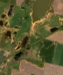

In [ ]:
# Verificación
row = train_df.iloc[10,:]
lsimgaug = GEELandsatImagePatchFeatures(
            output_path = "./tmp/"
        )
img_filename = lsimgaug.process_row(row)
print(img_filename)
IPython.display.Image('./tmp/'+img_filename,width=640,height=480)

### Generación de imágenes

#### Generar imagen Landsat8 con máscara de nubes

In [ ]:
# Test
area_margin = 0.1 # se deja un margen para tomar píxeles vecinos de los puntos en la frontera
area = ee.Geometry.Rectangle([-62.86168788358889-area_margin, 
                              -34.37532678620215-area_margin, 
                              -61.21017986410942+area_margin, 
                              -33.45821861509694+area_margin])

# Landsat8 Imágenes con Surface Reflectance
L8SR = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

# Bandas de interés para la predicción
BANDS = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7']

start_date =  '2018-01-01'
end_date =  '2020-12-31'

# Cloud masking function.
def maskL8sr(image):
  cloudShadowBitMask = ee.Number(2).pow(3).int()
  cloudsBitMask = ee.Number(2).pow(5).int()
  qa = image.select('pixel_qa')
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(
    qa.bitwiseAnd(cloudsBitMask).eq(0))
  return image.updateMask(mask).select(BANDS).divide(10000)

ls8 = L8SR.filterDate(start_date, end_date) \
          .filterBounds(area) \
          .map(maskL8sr).median() \
          .select(BANDS) 

#### Descargar imagen de GEE a Google Drive como GeoTiff

In [ ]:
import time

def download_gee_img_to_google_drive(img,area,output_path,description,scale=30,verbose=True):
  task = ee.batch.Export.image.toDrive(**{
    'image': img,
    'description': description,
    'folder': output_path,
    'maxPixels': 1e9,
    'scale': scale,
    'region': area.getInfo()['coordinates']
  })
  task.start()

  if verbose:
    print("Ready")
    while task.status()['state'] == 'READY':
      time.sleep(1)
    print("Running")
    while task.status()['state'] == 'RUNNING':
      time.sleep(1)  
    print(task.status()['state'])
    if task.status()['state'] == 'FAILED':
      print(task.status()['error_message'])
    elif task.status()['state'] == 'COMPLETED':
      print("Success")    
  return

#### Código Javasript para generar imagen mosaico Sentinel2 por campaña en Google Earth Engine Code Editor

Copiar y pegar en [Code Editor](https://code.earthengine.google.com/).
Adaptado de código original: https://developers.google.com/earth-engine/tutorials/community/classify-maizeland-ng

~~~javascript
/* Exportación de Mosaico Sentinel2 que maximiza NDVI para clasificación de cultivos.
Adaptado de: https://developers.google.com/earth-engine/tutorials/community/classify-maizeland-ng
*/

// Define a collection filtering function.
function filterBoundsDate(imgCol, aoi, start, end) {
  return imgCol.filterBounds(aoi).filterDate(start, end);
}

// Define a function to join the two collections on their 'system:index'
// property. The 'propName' parameter is the name of the property that
// references the joined image.
function indexJoin(colA, colB, propName) {
  var joined = ee.ImageCollection(ee.Join.saveFirst(propName).apply({
    primary: colA,
    secondary: colB,
    condition: ee.Filter.equals(
        {leftField: 'system:index', rightField: 'system:index'})
  }));
  // Merge the bands of the joined image.
  return joined.map(function(image) {
    return image.addBands(ee.Image(image.get(propName)));
  });
}

// Define a function to create a cloud masking function.
function buildMaskFunction(cloudProb) {
  return function(img) {
    // Define clouds as pixels having greater than the given cloud probability.
    var cloud = img.select('probability').gt(ee.Image(cloudProb));

    // Apply the cloud mask to the image and return it.
    return img.updateMask(cloud.not());
  };
}

function export_s2_mosaic_to_gdrive(aoi,start_date,end_date)
{
  // Import S2 TOA reflectance and corresponding cloud probability collections.
  var s2 = ee.ImageCollection('COPERNICUS/S2');
  var s2c = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY');
  
  // Define dates over which to create a composite.
  var start = ee.Date(start_date);
  var end = ee.Date(end_date);
  
  // Filter the collection by AOI and date.
  s2 = filterBoundsDate(s2, aoi, start, end);
  s2c = filterBoundsDate(s2c, aoi, start, end);
  
  // Join the cloud probability collection to the TOA reflectance collection.
  var withCloudProbability = indexJoin(s2, s2c, 'cloud_probability');
  
  // Map the cloud masking function over the joined collection, select only the
  // reflectance bands.
  var maskClouds = buildMaskFunction(50);
  var s2Masked = ee.ImageCollection(withCloudProbability.map(maskClouds))
                     .select(ee.List.sequence(0, 12));
  
  // Calculate the median of overlapping pixels per band.
  var median = s2Masked.median();
  
  // Calculate the difference between each image and the median.
  var difFromMedian = s2Masked.map(function(img) {
    var dif = ee.Image(img).subtract(median).pow(ee.Image.constant(2));
    return dif.reduce(ee.Reducer.sum()).addBands(img).copyProperties(img, [
      'system:time_start'
    ]);
  });
  
  // Generate a composite image by selecting the pixel that is closest to the
  // median.
  var bandNames = difFromMedian.first().bandNames();
  var bandPositions = ee.List.sequence(1, bandNames.length().subtract(1));
  
  
  var mosaic = difFromMedian.reduce(ee.Reducer.min(bandNames.length()))
                   .select(bandPositions, bandNames.slice(1));
  
  // Display the mosaic.
  Map.addLayer(mosaic, {bands: ['B11', 'B8', 'B3'], min: 225, max: 4000}, 'S2 mosaic');
  
  // Export the image, specifying scale and region.
  var task = Export.image.toDrive({
    image: mosaic,
    description: 'S2Mosaic_'+start_date+'_'+end_date,
    scale: 30,
    region: aoi
  }); 
}


/* Exportación Rectángulo Gral. López */
var margin = 0.1; // para los puntos que están justo en la frontera
var aoi = ee.Geometry.Rectangle(-62.86168788358889-margin,
                                -34.37532678620215-margin,
                                -61.21017986410942+margin, 
                                -33.45821861509694+margin);

// CAMPAÑA 2018-2019
export_s2_mosaic_to_gdrive(aoi,'2018-11-01','2019-05-01');

// CAMPAÑA 2010-2020
export_s2_mosaic_to_gdrive(aoi,'2019-11-01','2020-05-01');
~~~

## Exportación de este cuaderno a PDF

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc  &> /dev/null
!pip install pypandoc &> /dev/null

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/SolucionModeloFinal.ipynb' ./
!jupyter nbconvert --to PDF "SolucionModeloFinal.ipynb"
# Falla con: Text line contains an invalid character.